# Imports

In [2]:
import numpy as np
import qiskit.quantum_info as qi
from math import *
import scipy
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library import MCMT

In [3]:
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.circuit.library import QFT,RYGate
from qiskit.quantum_info import random_statevector
from qiskit.opflow import X,Y,Z,I,CX
from math import sqrt
pi = np.pi
sin = np.sin
cos = np.cos
exp = np.exp

In [4]:
import matplotlib.pyplot as plt

# Definitions

In [5]:
#Operator to gate convertor
def qc(operator):
    qubit_list = list(range(int(np.log(len(operator))/np.log(2))))
    qc = QuantumCircuit(len(qubit_list))
    qc.unitary(operator,qubit_list)
    return qc

In [6]:
# will help to obtain the parameters for formation of B gate
#t here is len(betas-1), in this scheme
def theta_computer(betas):
    t = len(betas)-1
    A = sum(betas)
    alphas = np.sqrt(np.array(betas)/A)
    thetas = []
    for i in range(t):
        if i == 0 :
            thetas.append(acos(alphas[i]))
        else:
            fac = 0
            j = 0
            while j<i :
                fac+=alphas[j]**2
                j+=1
            thetas.append(acos(alphas[i]/sqrt(1-fac)))
    return thetas,A

In [7]:
#create gate
def negate(circ,neg = True):
    op = qi.Operator(circ)
    if neg == True:
        op = -op.data
    else:
        op = op.data
    return op

In [8]:
simulator = Aer.get_backend('statevector_simulator')
qasm = Aer.get_backend('qasm_simulator')

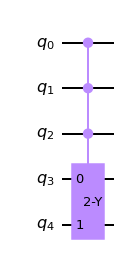

In [9]:
ccz = MCMT('cz',2,1)
ccx = MCMT('cx',2,1)
ccy = MCMT('cy',2,1)  
cccx = MCMT('cx',3,1)
cccy = MCMT('cy',3,1)
cccz = MCMT('cz',3,1)
cccxx = MCMT('cx',3,2)
cccyy = MCMT('cy',3,2)
cccyy.draw('mpl')

# Defining Gates
## leave this portion as I define the gates for each part in thoir individual sections

In [120]:
zi = [[1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,-1]]
iz_ = [[-1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,1]]
xx_ = [[0,0,0,-1],[0,0,-1,0],[0,-1,0,0],[-1,0,0,0]]
yy_ = [[0,0,0,1],[0,0,-1,0],[0,-1,0,0],[1,0,0,0]]
xi = [[0,0,1,0],[0,0,0,1],[1,0,0,0],[0,1,0,0]]
ZI = qc(ZI).to_gate(label = 'ZI').control(4)
IZ_ = qc(IZ_).to_gate(label = 'IZ_').control(4)
XX_ = qc(XX_).to_gate(label = 'XX_').control(4)
YY_ = qc(YY_).to_gate(label = 'YY_').control(4)
XI = qc(XI).to_gate(label = 'XI').control(4)

TypeError: object of type 'ControlledGate' has no len()

In [9]:
ZI_ = [[-1,0,0,0],[0,-1,0,0],[0,0,1,0],[0,0,0,1]]
IZ_ = [[-1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,1]]
ZZ = [[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]]
XI_ = [[0,0,-1,0],[0,0,0,-1],[-1,0,0,0],[0,-1,0,0]]
XZ_ = [[0,0,-1,0],[0,0,0,1],[-1,0,0,0],[0,1,0,0]]
IX_ = [[0,-1,0,0],[-1,0,0,0],[0,0,0,-1],[0,0,-1,0]]
ZX = [[0,1,0,0],[1,0,0,0],[0,0,0,-1],[0,0,-1,0]]
gZI_ = qc(ZI_).to_gate(label = 'ZI_').control(4)
gIZ_ = qc(IZ_).to_gate(label = 'IZ_').control(4)
gZZ = qc(ZZ).to_gate(label = 'ZZ').control(4)
gXI_ = qc(XI_).to_gate(label = 'XI_').control(4)
gXZ_ = qc(XZ_).to_gate(label = 'XZ_').control(4)
gIX_ = qc(IX_).to_gate(label = 'IX_').control(4)
gZX = qc(ZX).to_gate(label = 'ZX').control(4)

In [10]:
ZZ_ = [[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,-1]]
XZ  = [[0,0,1,0],[0,0,0,-1],[1,0,0,0],[0,-1,0,0]]
gXZ = qc(XZ).to_gate(label = 'XZ').control(4)
gZZ_ = qc(ZZ_).to_gate(label = 'ZZ_').control(4)

In [11]:
ziii = QuantumCircuit(4)
ziii.z(3)
ZIII = qc(negate(ziii,neg = False)).to_gate(label = 'ZIII').control(4)
izii = QuantumCircuit(4)
izii.z(2)
IZII_ = qc(negate(izii)).to_gate(label = 'IZII_').control(4)
iizi = QuantumCircuit(4)
iizi.z(1)
IIZI_ = qc(negate(iizi)).to_gate(label = 'IIZI_').control(4)
iiiz = QuantumCircuit(4)
iiiz.z(0)
IIIZ_ = qc(negate(iiiz)).to_gate(label = 'IIIZ_').control(4)
xxii = QuantumCircuit(4)
xxii.x([2,3])
XXII_ = qc(negate(xxii)).to_gate(label = 'XXII_').control(4)
yyii = QuantumCircuit(4)
yyii.y([2,3])
YYII_ = qc(negate(yyii)).to_gate(label = 'YYII_').control(4)
ixxi = QuantumCircuit(4)
ixxi.x([1,2])
IXXI_ = qc(negate(ixxi)).to_gate(label = 'IXXI_').control(4)
iyyi = QuantumCircuit(4)
iyyi.y([1,2])
IYYI_ = qc(negate(iyyi)).to_gate(label = 'IYYI_').control(4)
iixx = QuantumCircuit(4)
iixx.x([0,1])
IIXX_ = qc(negate(iixx)).to_gate(label = 'IIXX_').control(4)
iiyy = QuantumCircuit(4)
iiyy.y([0,1])
IIYY_ = qc(negate(iiyy)).to_gate(label = 'IIYY_').control(4)
IXXI = qc(negate(ixxi,neg = False)).to_gate(label = 'IXXI').control(4)
IYYI = qc(negate(iyyi,neg = False)).to_gate(label = 'IYYI').control(4)
IIXX = qc(negate(iixx,neg = False)).to_gate(label = 'IIXX').control(4)
IIYY = qc(negate(iiyy,neg = False)).to_gate(label = 'IIYY').control(4)
ixix = QuantumCircuit(4)
ixix.x([0,2])
IXIX_ = qc(negate(ixix)).to_gate(label = 'IXIX_').control(4)
iyiy = QuantumCircuit(4)
iyiy.y([0,2])
IYIY_ = qc(negate(iyiy)).to_gate(label = 'IYIY_').control(4)
xixi = QuantumCircuit(4)
xixi.x([1,3])
XIXI_ = qc(negate(xixi)).to_gate(label = 'XIXI_').control(4)
yiyi = QuantumCircuit(4)
yiyi.y([1,2])
YIYI_ = qc(negate(yiyi)).to_gate(label = 'YIYI_').control(4)
xiix = QuantumCircuit(4)
xiix.x([0,3])
XIIX_ = qc(negate(xiix)).to_gate(label = 'XIIX_').control(4)
yiiy = QuantumCircuit(4)
yiiy.y([0,3])
YIIY_ = qc(negate(yiiy)).to_gate(label = 'YIIY_').control(4)

In [12]:
#ZZ = [[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,-1,0,0,0,0,0],[0,0,0,-1,0,0,0,0],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,-1,0,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1]]
#YY = [[0,0,0,0,0,0,-1,0],[0,0,0,0,0,0,0,-1],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[-1,0,0,0,0,0,0,0],[0,-1,0,0,0,0,0,0]]
#IX = [[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0]]
#ZX_ = [[0,0,-1,0,0,0,0,0],[0,0,0,-1,0,0,0,0],[1,0,0,0,0,0,0,0],[0,-1,0,0,0,0,0,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0]]
#XI_ = [[0,0,0,0,-1,0,0,0],[0,0,0,0,0,-1,0,0],[0,0,0,0,0,0,-1,0],[0,0,0,0,0,0,0,-1],[-1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,-1,0,0,0,0,0],[0,0,0,-1,0,0,0,0]]
XZ_= [[0,0,-1,0],[0,0,0,1],[-1,0,0,0],[0,1,0,0]]
YY = [[0,0,0,-1],[0,0,1,0],[0,1,0,0],[-1,0,0,0]]
IX = [[0,1,0,0],[1,0,0,0],[0,0,0,1],[0,0,1,0]]
ZX_ =[[0,-1,0,0],[-1,0,0,0],[0,0,0,1],[0,0,1,0]]
#gZZ = qc(ZZ).to_gate(label = 'ZZI').control(4)
#gYY = qc(YY).to_gate(label = 'YYI').control(4)
#gIX = qc(IX).to_gate(label = 'IXI').control(4)
#gZX_ = qc(ZX_).to_gate(label = 'ZXI_').control(4)
#gXI_ = qc(XI_).to_gate(label = 'XII_').control(4)
gXZ_ = qc(XZ_).to_gate(label = 'XZ_').control(4)
gYY = qc(YY).to_gate(label = 'YY').control(4)
gIX = qc(IX).to_gate(label = 'IX').control(4)
gZX_ = qc(ZX_).to_gate(label = 'ZX_').control(4)

# Questions
- 1) Is the entire implementation for N = 2 JWT and GC, EFT is complete and correct? -> true
- 2) Why does V implementation in N = 4 GC giving wierd results? not concluded
- 3) Why is N = 3 case tricky? no problem
- 4) Changing order for gate preparation step in N = 2 is not affecting the result but for N = 4 it is affecting and none is correct? 
- 5) How does Pooja Ma'am implement LCU for N = 4, what are the differences (how does she handle the negative signs)? - > same way
- 6) Is swap or destructive swap test required here? If so, how to perform it? we don't need to apply this
- 7) If problems LCU cannot be sovled can we try Hadamard test?

# Hamiltonians (EFT)

## N = 2,GC

In [9]:
#Defining the Hamiltonian to obtain eigenstate
#1 qubit, GC
#H2_GC = (5.906709 * I ) - \
 #       (6.34329 * Z ) - \
  #      (4.28661 * X )
H2_GC = (-6.34329 * Z ) - \
        (4.28661 * X )
e,v = np.linalg.eig(H2_GC.to_matrix())
v = np.transpose(v) #to obtain eigen state of Hamiltonian
e,v

(array([-7.65587051+0.j,  7.65587051+0.j]),
 array([[ 0.95617792+0.j,  0.29278626-0.j],
        [-0.29278626+0.j,  0.95617792+0.j]]))

In [83]:
#coefficients of hamiltonian stored in beta list
betas = [6.34329,4.28661]
#theta to create V matrices
theta,A = theta_computer(betas)

In [86]:
#unitary gates with sign consideration
z = [[-1,0],[0,1]]
x = [[0,-1],[-1,0]]
Z_ = qc(z).to_gate(label = 'Z_').control(1) #handling negative sign through matrices
X_ = qc(x).to_gate(label = 'X_').control(1) #gate

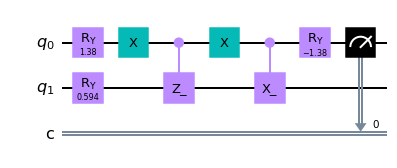

In [87]:
cir = QuantumCircuit(2,1)
cir.ry(0.594,1) #initial state which is groundstate
cir.ry(2*theta[0],0) # V gate
cir.x(0)
cir.append(Z_,[0,1]) #gate for -Z_0  
cir.x(0)
cir.append(X_,[0,1]) #gate for -X_0
cir.ry(-2*theta[0],0)
cir.measure(0,0)
cir.draw('mpl')

In [88]:
E = []
probs = []
shots_ = [8192]
for shots in shots_:
    E_temp = []
    prob_temp = []
    for runs in range(20):
        result = execute(cir, backend = simulator, shots = shots).result()
        count = result.get_counts(cir)
        prob_temp.append(count['0']/shots)
        E_temp.append(-A*np.sqrt(count['0']/shots)+5.906709)  #adding the extra coefficient with identity
    E.append(E_temp)
    probs.append(prob_temp)
print(np.median(E))

-1.7529139009872936


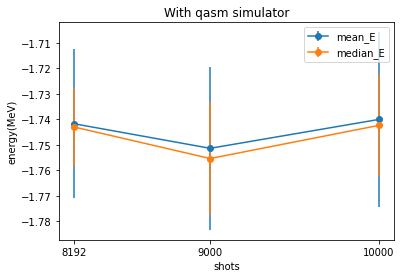

In [216]:
mean_E = []
std_E = []
med_E = []
mad_E = []
prob = []
for i in range(len(shots_)):
    mean_E.append(np.mean(E[i]))
    std_E.append(np.std(E[i]))
    med_E.append(np.median(E[i]))
    mad_E.append(mad(E[i]))
    prob.append(np.mean(probs[i]))

plt.errorbar(shots_,mean_E,yerr = std_E, label = 'mean_E',marker = 'o')
#plt.plot(shots,std_E,label = 'std_E')
plt.errorbar(shots_,med_E,yerr = mad_E,label = 'median_E',marker = 'o')
#plt.scatter(shots_,prob,label = 'prob')
#plt.plot(shots,mad_E,label = 'mad_E')
plt.xlabel('shots')
plt.ylabel('energy(MeV)')
plt.xticks([8192,9000,10000])
plt.title('With qasm simulator')
plt.legend(loc = 'best')
plt.savefig('DPEGc2.png')

In [193]:
med_p_mad = np.median(np.array(E))+mad(np.array(E))
med_mad = np.median(E)-mad(np.array(E))
mean_p_std = np.mean(np.array(E))+np.std(np.array(E))
mean_std = np.mean(np.array(E))-np.std(np.array(E))

In [195]:
med_p_mad,med_mad,mean_p_std,mean_std

(array([-1.73500581, -1.74237829, -1.71066793, -1.72674851, -1.73715182,
        -1.7097087 , -1.72191942, -1.73737565, -1.73714552, -1.74352584,
        -1.73593055, -1.74115973, -1.7230467 , -1.71853679, -1.73824924,
        -1.74010635, -1.73893176, -1.74304407, -1.72373249, -1.7103971 ]),
 array([-1.75239536, -1.74502288, -1.77673324, -1.76065266, -1.75024935,
        -1.77769246, -1.76548175, -1.75002552, -1.75025565, -1.74387532,
        -1.75147062, -1.74624144, -1.76435447, -1.76886438, -1.74915193,
        -1.74729482, -1.74846941, -1.7443571 , -1.76366867, -1.77700406]),
 -1.7121826009227985,
 -1.776573762505877)

## for N = 2, JWT 

In [41]:
#H2_op = (5.906709 * I ^ I) + \
#        (0.218291 * Z ^ I) - \
#        (6.125 * I ^ Z) - \
#        (2.143304 * X ^ X) - \
#        (2.143304 * Y ^ Y)
H2_op = (0.218291 * Z ^ I) - \
        (6.125 * I ^ Z) - \
        (2.143304 * X ^ X) - \
        (2.143304 * Y ^ Y)
#ingoring the identity part that we will add at the end
e,v = np.linalg.eig(H2_op.to_matrix())
v = np.transpose(v)
e,v[0]

(array([-7.65587022+0.j,  7.65587022+0.j, -5.906709  +0.j,  5.906709  +0.j]),
 array([-0.        -0.j,  0.29278612-0.j,  0.95617796+0.j, -0.        -0.j]))

In [42]:
betas = [0.218291,6.125,2.143304,2.143304]
thetas, A =theta_computer(betas)

In [43]:
#not sure which ordering is correct
zi = QuantumCircuit(2)
zi.z(0)
ZI = qc(negate(zi,neg = False)).to_gate(label = 'ZI').control(2)
iz = QuantumCircuit(2)
iz.z(1)
IZ_ = qc(negate(iz)).to_gate(label = 'IZ_').control(2)
xx = QuantumCircuit(2)
xx.x([0,1])
XX_ = qc(negate(xx)).to_gate(label = 'XX_').control(2)
yy = QuantumCircuit(2)
yy.y([0,1])
YY_ = qc(negate(yy)).to_gate(label = 'YY_').control(2)

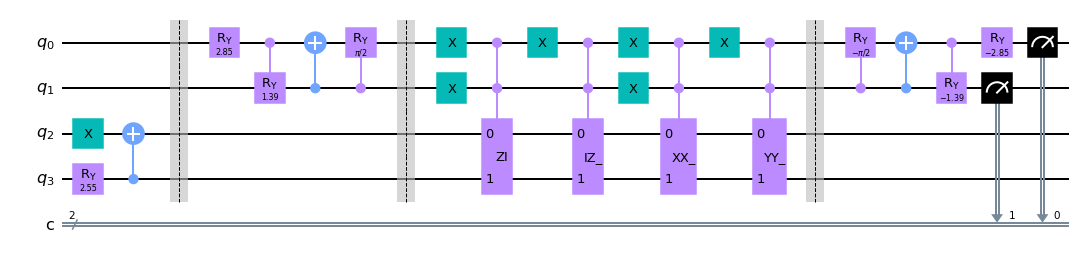

In [46]:
H2_cir = QuantumCircuit(4,2)
#state preparation
H2_cir.ry(2.547304378732438,3)
H2_cir.x(2)
H2_cir.cx(3,2)
H2_cir.barrier()
#preparation of V gate using algorithm in Pooja Ma'am's paper
H2_cir.ry(2*thetas[0],0)
H2_cir.cry(2*thetas[1],0,1)
H2_cir.cx(1,0)
H2_cir.cry(2*thetas[2],1,0)
H2_cir.barrier()
#applying unitaries as sum
H2_cir.x([0,1])
H2_cir.append(ZI,[0,1,2,3])
H2_cir.x(0)
H2_cir.append(IZ_,[0,1,2,3])
H2_cir.x([0,1])
H2_cir.append(XX_,[0,1,2,3])
H2_cir.x(0)
H2_cir.append(YY_,[0,1,2,3])
H2_cir.barrier()
#B dagger
H2_cir.cry(-2*thetas[2],1,0)
H2_cir.cx(1,0)
H2_cir.cry(-2*thetas[1],0,1)
H2_cir.ry(-2*thetas[0],0)
H2_cir.measure([0,1],[0,1])
H2_cir.draw('mpl')

In [47]:
shots = 8192
E = []
probs = []
for i in range(20):
    result = execute(H2_cir, backend = qasm, shots = shots).result()
    count = result.get_counts(H2_cir)
    probs.append(count['00']/shots)
    E.append(-A*np.sqrt(count['00']/shots)+5.906709)
print('energy = ',E,'\n')

energy =  [-1.7740438628457698, -1.6700801940134902, -1.6937094368214627, -1.7335309062499995, -1.7254025087532172, -1.726306091483993, -1.7443553365746132, -1.7371407528517215, -1.7407488954896913, -1.724498819032596, -1.7443553365746132, -1.7488609987851529, -1.8116641019454303, -1.6973381877738847, -1.7803266883240125, -1.770451368326115, -1.761462768629495, -1.731725343207831, -1.7623621026815677, -1.7407488954896913] 



## N = 4, GC, EFT

In [40]:
#try doing with sum of 5 terms in H add 6th term
#do with initialization of V with 5 terms and then add 6 terms

In [113]:
#(14.328/trotter_number * I ^ I) - \
H4_GC = -(7.814 * X ^ I) - \
        (3.913 * I ^ X) + \
        (3.913 * Z ^ X) - \
        (1.422 * Z ^ I) - \
        (8.422 * I ^ Z) + \
        (3.527 * X ^ Z) - \
        (4.922 * Z ^ Z)
e,v = np.linalg.eig(H4_GC.to_matrix())
v = np.transpose(v)
vec = v[0][::-1]
e,v[0]

(array([-16.47339042+0.j,  -8.25620643+0.j,   3.42374582+0.j,
         21.30585103+0.j]),
 array([0.91354847+0.j, 0.06742893-0.j, 0.36384043-0.j, 0.16882733-0.j]))

In [43]:
(X^Z).to_matrix()

array([[ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],
       [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j]])

In [101]:
betas = [7.814,3.913,3.913,1.422,8.422,3.527,4.922]
thetas, A = theta_computer(betas)

In [102]:
ccry = RYGate(2*thetas[3]).control(2) 
ccry2 = RYGate(2*thetas[5]).control(2) 

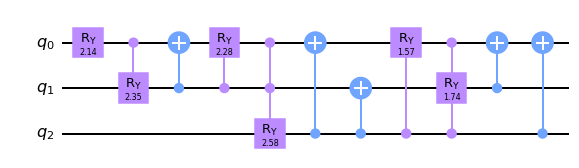

In [103]:
#Qauntum Circuit for V_gate and V_dag
V_cir = QuantumCircuit(3)
V_cir.ry(2*thetas[0],0)
V_cir.cry(2*thetas[1],0,1)
V_cir.cx(1,0)
V_cir.cry(2*thetas[2],1,0)
V_cir.append(ccry,[0,1,2])
V_cir.cx(2,0)
V_cir.cx(2,1)
V_cir.cry(2*thetas[4],2,0)
V_cir.append(ccry2,[2,0,1])
V_cir.cx(1,0)
V_cir.cx(2,0)
V_dag = V_cir.inverse()
V_cir.draw('mpl')

### Why is this happening? 
### With just 6 terms at least the V is now in correct order

[0.23027731117201544,
 0.11531547461173489,
 0.11531547461173489,
 0.04190610909733887,
 0.24819497244570185,
 0.10394011728995374,
 0.14505054077152035]

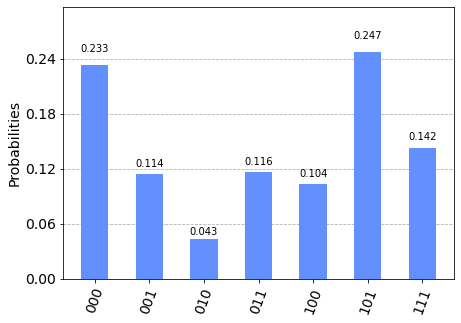

In [104]:
#to test correctness of V
shots = 20000
new = []
for beta in betas:
    new.append(beta/A)
display(new)
V_cir.measure_all()
result = execute(V_cir, backend = simulator, shots = shots).result()
count = result.get_counts(V_cir)
plot_histogram(count)

In [105]:
#controlled gates
xi = QuantumCircuit(2)
xi.x(1)
XI_ = qc(negate(xi)).to_gate(label='XI_').control(3)
ix = QuantumCircuit(2)
ix.x(0)
IX_ = qc(negate(ix)).to_gate(label='IX_').control(3)
zi = QuantumCircuit(2)
zi.z(1)
ZI_ = qc(negate(zi)).to_gate(label='ZI_').control(3)
iz = QuantumCircuit(2)
iz.z(0)
IZ_ = qc(negate(iz)).to_gate(label='IZ_').control(3)
xz = QuantumCircuit(2)
xz.x(1)
xz.z(0)
XZ = qc(negate(xz,neg = False)).to_gate(label='XZ').control(3)
zx = QuantumCircuit(2)
zx.z(1)
zx.x(0)
ZX = qc(negate(zx,neg = False)).to_gate(label='ZX').control(3)
zz = QuantumCircuit(2)
zz.z([0,1])
ZZ_ = qc(negate(zz)).to_gate(label='ZZ_').control(3)

In [106]:
negate(zz)

array([[-1.-0.j, -0.-0.j, -0.-0.j, -0.-0.j],
       [-0.-0.j,  1.-0.j, -0.-0.j, -0.-0.j],
       [-0.-0.j, -0.-0.j,  1.-0.j, -0.-0.j],
       [-0.-0.j, -0.-0.j, -0.-0.j, -1.-0.j]])

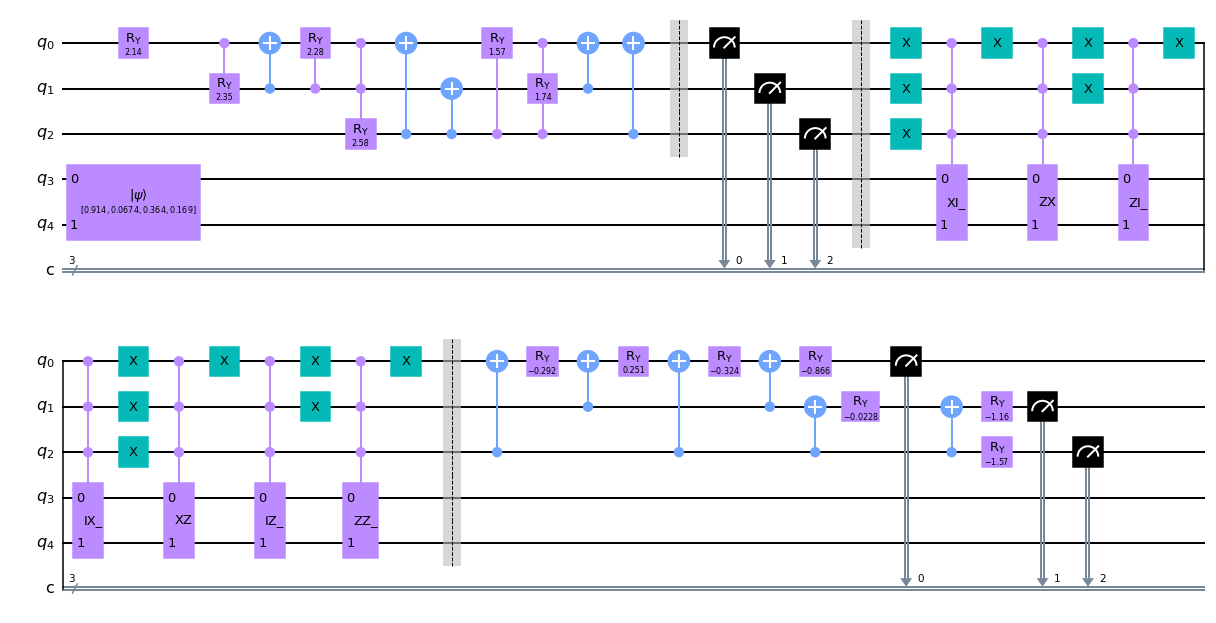

In [114]:
gc4 =QuantumCircuit(5,3)
#V gate
gc4.compose(V_cir,[0,1,2],inplace= True)
#state intialization
gc4.initialize(v[0],[3,4])
gc4.barrier()
#adder circuit
gc4.x([0,1,2])
gc4.append(XI_,[0,1,2,3,4])
gc4.x([0])
gc4.append(ZX,[0,1,2,3,4])
gc4.x([0,1])
gc4.append(ZI_,[0,1,2,3,4])
gc4.x(0)
gc4.append(IX_,[0,1,2,3,4])
gc4.x([0,1,2])
gc4.append(XZ,[0,1,2,3,4])
gc4.x(0)
gc4.append(IZ_,[0,1,2,3,4])
gc4.x([0,1])
gc4.append(ZZ_,[0,1,2,3,4])
gc4.x([0])
gc4.barrier()
gc4.compose(V_dag,[0,1,2],inplace = True)
gc4.measure([0,1,2],[0,1,2])
gc4.draw('mpl')

In [115]:
E = []
probs = []
shots = 5000
for i in range(1):
    result = execute(gc4, backend = simulator, shots = shots).result()
    count = result.get_counts(gc4)
    probs.append(count['000']/shots)
    E.append(-A*np.sqrt(count['000']/shots))
display(E,probs)

[-12.36577370564414]

[0.1328]

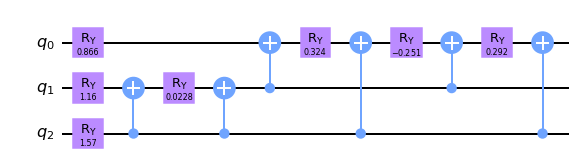

In [116]:
# Trying with V initilalize
#trying all 7 terms in H with initialize V method
#V and V_dag
betas = [7.814,3.913,3.913,1.422,8.422,3.527,4.922,0]
A = sum(betas)
gammas = []
for beta in betas:
    gammas.append(np.sqrt(beta/A))
#for Vdag
Vdag =QuantumCircuit(3)
Vdag.initialize(gammas,[0,1,2])
transpilecir = transpile(Vdag,basis_gates = ['x','y','z','rx','ry','rz','cx'],optimization_level = 3)
display(transpilecir.draw('mpl'))
V_dag = transpilecir.inverse()

In [119]:
gc4 =QuantumCircuit(5,3)
#V gate
gc4.compose(Vdag,[0,1,2],inplace= True)
#state intialization
gc4.initialize(v[0],[3,4])
gc4.barrier()
#adder circuit
gc4.x([0,1,2])
gc4.append(XI_,[0,1,2,3,4])
gc4.x([0])
gc4.append(IX_,[0,1,2,3,4])
gc4.x([0,1])
gc4.append(ZX,[0,1,2,3,4])
gc4.x(0)
gc4.append(ZI_,[0,1,2,3,4])
gc4.x([0,1,2])
gc4.append(IZ_,[0,1,2,3,4])
gc4.x(0)
gc4.append(XZ,[0,1,2,3,4])
gc4.x([0,1])
gc4.append(ZZ_,[0,1,2,3,4])
gc4.x([0])
gc4.barrier()
gc4.compose(V_dag,[0,1,2],inplace = True)
gc4.measure([0,1,2],[0,1,2])

In [120]:
E = []
probs = []
shots = 5000
for i in range(1):
    result = execute(gc4, backend = simulator, shots = shots).result()
    count = result.get_counts(gc4)
    probs.append(count['000']/shots)
    E.append(-A*np.sqrt(count['000']/shots))
display(E,probs)

[-16.644473751170388]

[0.2406]

In [121]:
E[0]+14.328

-2.3164737511703883

### V by direct initialization method gave right results 

## How I obtained result for N = 4 last time?
Since H for N = 4 is :
$$H_4 = H_3 + \cdots$$
I simply did LCU for rest terms and added eigenvalue for $H_3$ part in the end

In [108]:
#H_4 = H_3+ 13.125291I+.....
H_4 = (-13.125 * I^I^I^Z)-(5.671* I^I^X^X)-(5.671* I^I^Y^Y)
e,v = np.linalg.eig(H_4.to_matrix())
v = np.transpose(v)
e+13.12591-2.046

array([-6.2667493+0.j, 28.4265693+0.j, 28.4265693+0.j, -6.2667493+0.j,
       28.4265693+0.j, -6.2667493+0.j, 28.4265693+0.j, -6.2667493+0.j,
       -2.04509  +0.j, 24.20491  +0.j, -2.04509  +0.j, 24.20491  +0.j,
       -2.04509  +0.j, 24.20491  +0.j, -2.04509  +0.j, 24.20491  +0.j])

In [100]:
betas = [13.125,5.671,5.671]
thetas, A =theta_computer(betas)

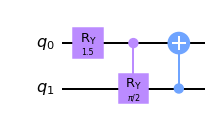

In [94]:
# V and V_dag gate
V_cir = QuantumCircuit(2)
V_cir.ry(2*thetas[0],0)
V_cir.cry(2*thetas[1],0,1)
V_cir.cx(1,0)
V_dag = V_cir.inverse()
V_cir.draw('mpl')

array([0.53643683, 0.23178158, 0.23178158])

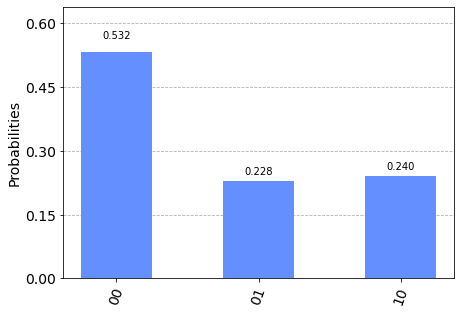

In [91]:
#to test correctness of V
new = np.array(betas)/A
display(new)
V_cir.measure_all()
result = execute(V_cir, backend = simulator, shots = shots).result()
count = result.get_counts(V_cir)
plot_histogram(count)

In [95]:
# defining gates
iiiz = QuantumCircuit(4)
iiiz.z(3)
IIIZ_ = qc(negate(iiiz)).to_gate(label = 'IIIZ_').control(2)
iixx = QuantumCircuit(4)
iixx.x([3,2])
IIXX_ = qc(negate(iixx)).to_gate(label = 'IIXX_').control(2)
iiyy = QuantumCircuit(4)
iiyy.y([3,2])
IIYY_ = qc(negate(iiyy)).to_gate(label = 'IIYY_').control(2)

In [103]:
#defining gates by MCMT
ccz = MCMT('cz',2,1)
ccx = MCMT('cx',2,1)
ccy = MCMT('cy',2,1)

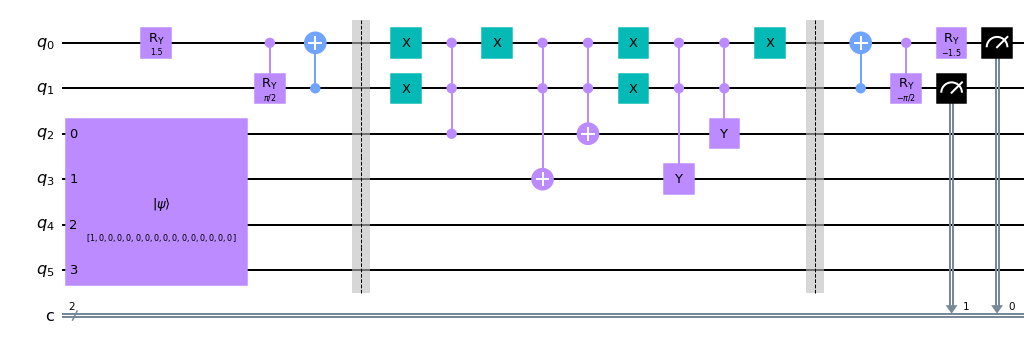

In [111]:
H4s = QuantumCircuit(6,2)
#V gate
H4s.compose(V_cir,[0,1],inplace = True)
H4s.initialize(v[8],[2,3,4,5])
H4s.barrier()
H4s.x([0,1])
H4s.compose(ccz,[0,1,2],inplace = True)
H4s.x(0)
H4s.compose(ccx,[0,1,3],inplace = True)
H4s.compose(ccx,[0,1,2],inplace = True)
H4s.x([0,1])
H4s.compose(ccy,[0,1,3],inplace = True)
H4s.compose(ccy,[0,1,2],inplace = True)
H4s.x(0)
H4s.barrier()
H4s.compose(V_dag,[0,1],inplace = True)
H4s.measure([0,1],[0,1])
H4s.draw('mpl')

In [112]:
shots = 8192
E = []
probs = []
for i in range(1):
    result = execute(H4s, backend = simulator, shots = shots).result()
    count = result.get_counts(H4s)
    probs.append(count['00']/shots)
    E.append(-A*np.sqrt(count['00']/shots))
print('energy = ',E,'\n')
print(E[0]+13.125-2.046)

energy =  [-13.101688165863674] 

-2.022688165863674


# N = 4, JWT

In [95]:
#(28.657* I ^ I ^ I^I) + \
H4_op = (0.218 * Z ^ I ^ I ^ I) - \
        (6.125 * I ^ Z ^ I^ I) - \
        (2.143 * X ^ X ^ I^I) - \
        (2.143 * Y ^ Y ^ I^I)# - \
        #(9.625 * I ^ I ^ Z^I) - \
        #(13.125 * I ^ I ^ I^Z) - \
        #(5.671 * I ^ I ^ X^X) - \
        #(5.671 * I ^I ^ Y^Y) - \
        #(3.913 * I ^ X ^ X^I) - \
        #(3.913 * I ^ Y ^ Y^I)
e,v = np.linalg.eig(H4_op.to_matrix())
v = np.transpose(v)
vec = v[0][::-1]
e,vec,v[0]

(array([-7.65528869+0.j,  7.65528869+0.j, -7.65528869+0.j,  7.65528869+0.j,
        -7.65528869+0.j,  7.65528869+0.j, -7.65528869+0.j,  7.65528869+0.j,
        -5.907     +0.j, -5.907     +0.j, -5.907     +0.j, -5.907     +0.j,
         5.907     +0.j,  5.907     +0.j,  5.907     +0.j,  5.907     +0.j]),
 array([-0.        -0.j, -0.        -0.j, -0.        -0.j, -0.        -0.j,
        -0.        -0.j, -0.        -0.j, -0.        -0.j,  0.95618448+0.j,
        -0.        -0.j, -0.        -0.j, -0.        -0.j,  0.29276483-0.j,
        -0.        -0.j, -0.        -0.j, -0.        -0.j, -0.        -0.j]),
 array([-0.        -0.j, -0.        -0.j, -0.        -0.j, -0.        -0.j,
         0.29276483-0.j, -0.        -0.j, -0.        -0.j, -0.        -0.j,
         0.95618448+0.j, -0.        -0.j, -0.        -0.j, -0.        -0.j,
        -0.        -0.j, -0.        -0.j, -0.        -0.j, -0.        -0.j]))

In [85]:
betas = [0.218,6.125,2.143,2.143]
thetas, A = theta_computer(betas)

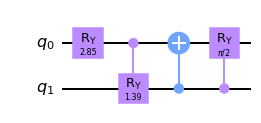

In [92]:
#Qauntum Circuit for V_gate and V_dag
V_cir = QuantumCircuit(2)
V_cir.ry(2*thetas[0],0)
V_cir.cry(2*thetas[1],0,1)
V_cir.cx(1,0)
V_cir.cry(2*thetas[2],1,0)
V_dag = V_cir.inverse()
V_cir.draw('mpl')

[0.020509925675039984,
 0.5762536456863298,
 0.20161821431931504,
 0.20161821431931504]

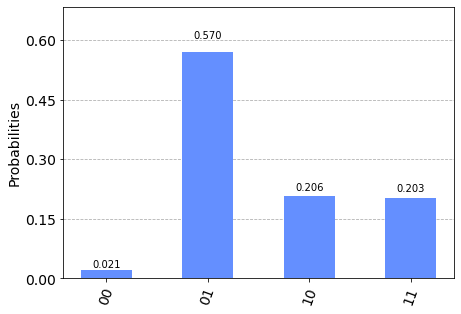

In [87]:
#to test correctness of V
shots = 20000
new = []
for beta in betas:
    new.append(beta/A)
display(new)
V_cir.measure_all()
result = execute(V_cir, backend = simulator, shots = shots).result()
count = result.get_counts(V_cir)
plot_histogram(count)

In [88]:
#controlled gates
xxii = QuantumCircuit(4)
xxii.x([0,1])
XXII_ = qc(negate(xxii)).to_gate(label='XXII_').control(2)
ziii = QuantumCircuit(4)
ziii.z(0)
ZIII = qc(negate(ziii,neg = False)).to_gate(label='ZIII').control(2)
izii = QuantumCircuit(4)
izii.z([1])
IZII_ = qc(negate(izii)).to_gate(label='IZII_').control(2)
yyii = QuantumCircuit(4)
yyii.y([0,1])
YYII_ = qc(negate(yyii)).to_gate(label='YYII_').control(2)

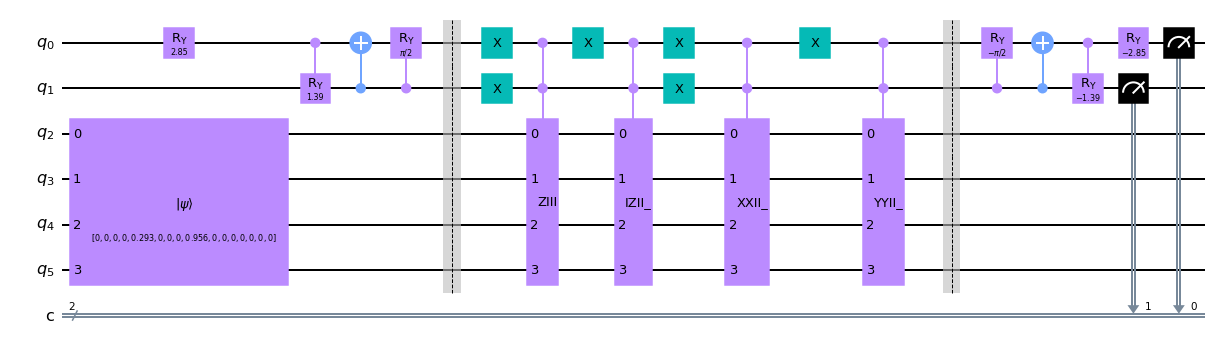

In [96]:
jwt4 =QuantumCircuit(6,2)
#V gate
jwt4.compose(V_cir,[0,1],inplace= True)
#state intialization
jwt4.initialize(v[0],[2,3,4,5])
jwt4.barrier()
#adder circuit
jwt4.x([0,1])
jwt4.append(ZIII,[0,1,2,3,4,5])
jwt4.x([0])
jwt4.append(IZII_,[0,1,2,3,4,5])
jwt4.x([0,1])
jwt4.append(XXII_,[0,1,2,3,4,5])
jwt4.x(0)
jwt4.append(YYII_,[0,1,2,3,4,5])
jwt4.barrier()
jwt4.compose(V_dag,[0,1],inplace = True)
jwt4.measure([0,1],[0,1])
jwt4.draw('mpl')

In [97]:
E = []
probs = []
shots = 20
for i in range(1):
    result = execute(jwt4, backend = simulator, shots = shots).result()
    count = result.get_counts(jwt4)
    probs.append(count['00']/shots)
    E.append(-A*np.sqrt(count['00']/shots))
display(E)

[-8.56937376066653]

## using V initialize method 

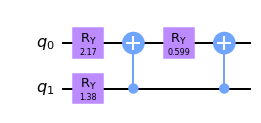

In [27]:
betas = [0.218,6.125,2.143,2.143]
A = sum(betas)
gammas = []
for beta in betas:
    gammas.append(np.sqrt(beta/A))
#for Vdag
Vdag =QuantumCircuit(2)
Vdag.initialize(gammas,[0,1])
transpilecir = transpile(Vdag,basis_gates = ['x','y','z','rx','ry','rz','cx'],optimization_level = 3)
display(transpilecir.draw('mpl'))
V_dag = transpilecir.inverse()

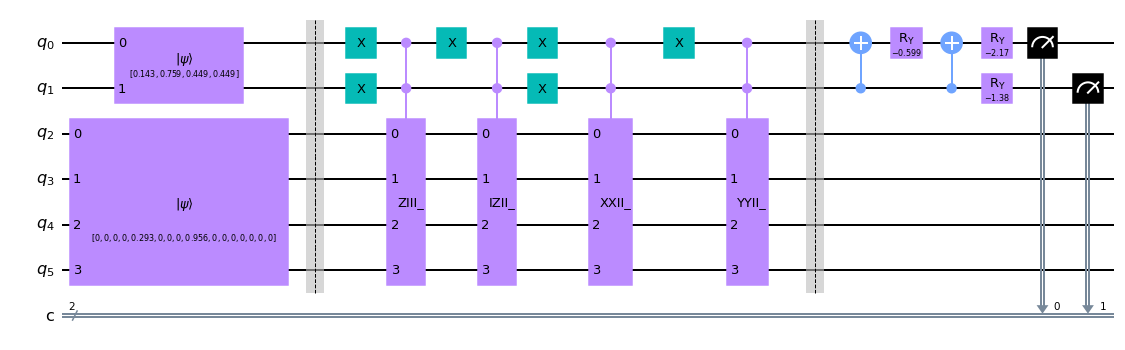

In [28]:
jwt4 =QuantumCircuit(6,2)
#V gate
jwt4.compose(Vdag,[0,1],inplace= True)
#state intialization
jwt4.initialize(v[0],[2,3,4,5])
jwt4.barrier()
#adder circuit
jwt4.x([0,1])
jwt4.append(ZIII,[0,1,2,3,4,5])
jwt4.x([0])
jwt4.append(IZII_,[0,1,2,3,4,5])
jwt4.x([0,1])
jwt4.append(XXII_,[0,1,2,3,4,5])
jwt4.x(0)
jwt4.append(YYII_,[0,1,2,3,4,5])
jwt4.barrier()
jwt4.compose(V_dag,[0,1],inplace = True)
jwt4.measure([0,1],[0,1])
jwt4.draw('mpl')

In [29]:
E = []
probs = []
shots = 8192
for i in range(1):
    result = execute(jwt4, backend = qasm, shots = shots).result()
    count = result.get_counts(jwt4)
    probs.append(count['00']/shots)
    E.append(-A*np.sqrt(count['00']/shots))
display(E)

[-6.610869053291746]

# Imaginary Barrier

## N = 4, JWT

In [17]:
#(28.657* I ^ I ^ I^I) + \
H4_op = (0.218 * Z ^ I ^ I ^ I) - \
        (6.125 * I ^ Z ^ I^ I) - \
        (2.143 * X ^ X ^ I^I) - \
        (2.143 * Y ^ Y ^ I^I) - \
        (9.625 * I ^ I ^ Z^I) - \
        (13.125 * I ^ I ^ I^Z) - \
        (5.671 * I ^ I ^ X^X) - \
        (5.671 * I ^I ^ Y^Y) - \
        (3.913 * I ^ X ^ X^I) - \
        (3.913 * I ^ Y ^ Y^I)
e,v = np.linalg.eig(H4_op.to_matrix())
v = np.transpose(v)
e

array([ -6.97777864+0.j,  10.90588281+0.j,  22.58581653+0.j,
        30.8000793 +0.j, -30.8000793 +0.j,   6.97777864+0.j,
       -22.58581653+0.j, -10.90588281+0.j,  24.72889583+0.j,
        13.04896211+0.j,   4.83469934+0.j,  -4.83469934+0.j,
       -13.04896211+0.j, -24.72889583+0.j, -28.657     +0.j,
        28.657     +0.j])

In [18]:
betas = [0.218,6.125,9.625,13.125,2.143,2.143,3.913,3.913,5.671,5.671,0,0,0,0,0,0]
A = sum(betas)

In [19]:
gammas = []
for beta in betas:
    gammas.append(np.sqrt(beta/A))
#for Vdag
Vdag =QuantumCircuit(4)
Vdag.initialize(gammas,[0,1,2,3])
transpilecir = transpile(Vdag,basis_gates = ['x','y','z','rx','ry','rz','cx'],optimization_level = 3)
V_dag = transpilecir.inverse()

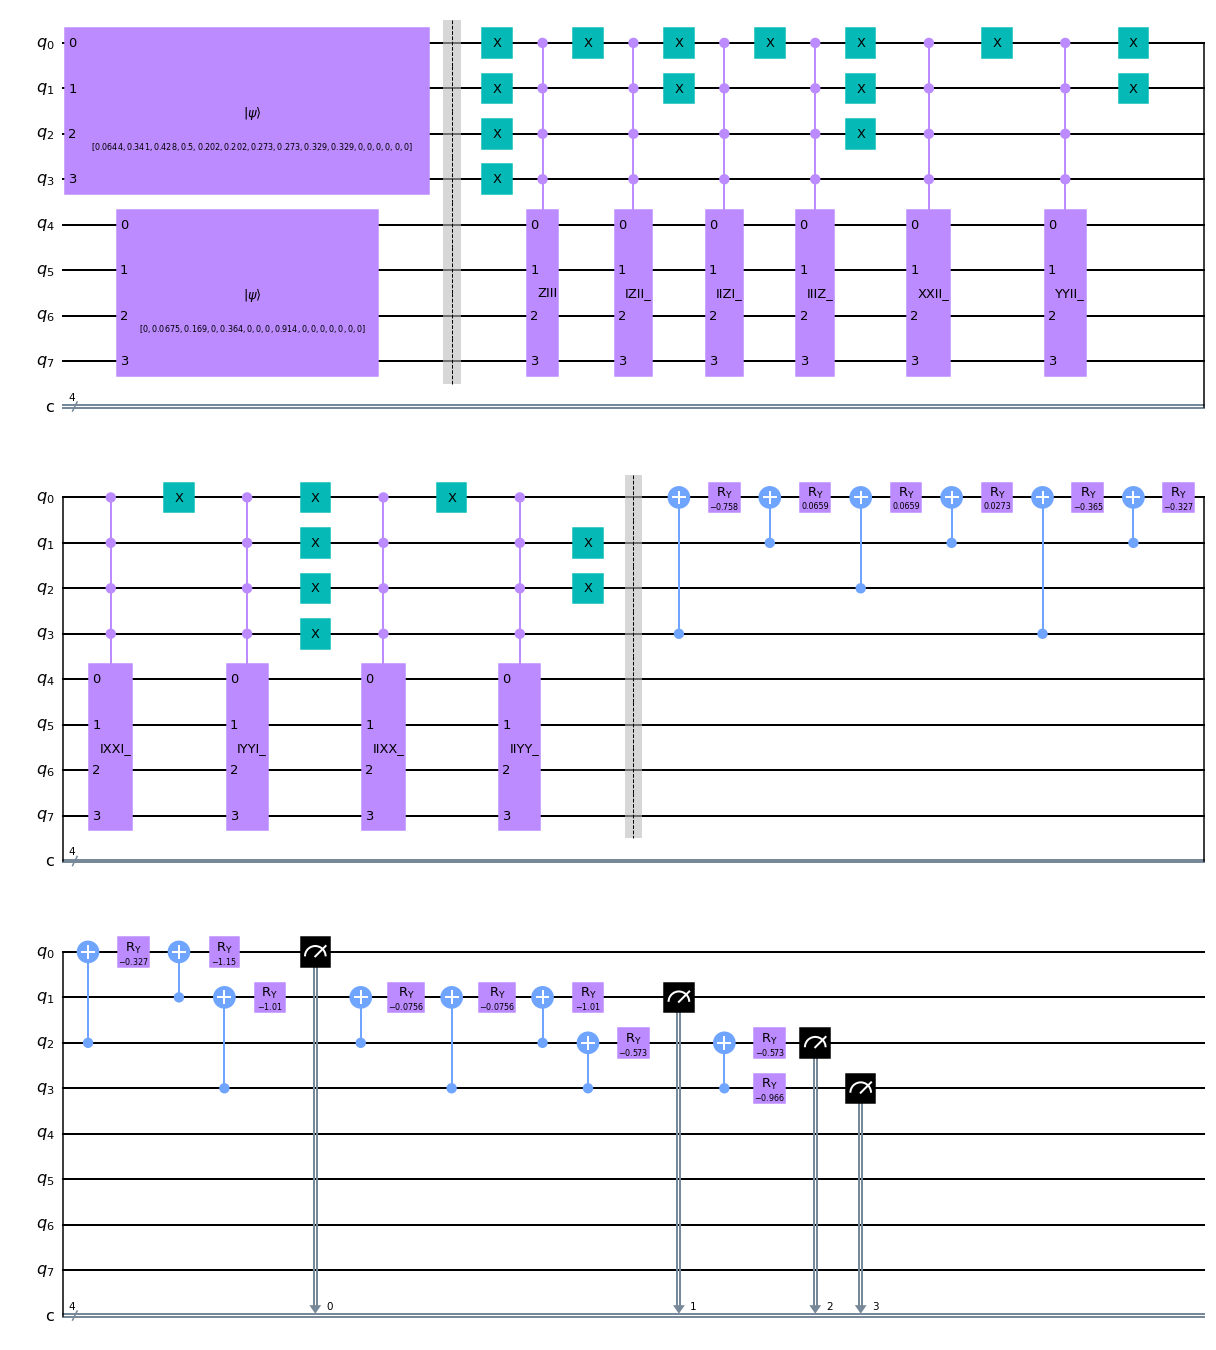

In [24]:
H4c_cir = QuantumCircuit(8,4)
H4c_cir.initialize(v[4],[4,5,6,7])
H4c_cir.initialize(gammas,[0,1,2,3])
H4c_cir.barrier()
H4c_cir.x([0,1,2,3])
H4c_cir.compose(ZIII,list(range(8)),inplace = True)
H4c_cir.x([0])
H4c_cir.compose(IZII_,list(range(8)),inplace = True)
H4c_cir.x([0,1])
H4c_cir.compose(IIZI_,list(range(8)),inplace = True)
H4c_cir.x(0)
H4c_cir.compose(IIIZ_,list(range(8)),inplace = True)
H4c_cir.x([0,1,2])
H4c_cir.compose(XXII_,list(range(8)),inplace = True)
H4c_cir.x(0)
H4c_cir.compose(YYII_,list(range(8)),inplace = True)
H4c_cir.x([0,1])
H4c_cir.compose(IXXI_,list(range(8)),inplace = True)
H4c_cir.x([0])
H4c_cir.compose(IYYI_,list(range(8)),inplace = True)
H4c_cir.x([0,1,2,3])
H4c_cir.compose(IIXX_,list(range(8)),inplace = True)
H4c_cir.x([0])
H4c_cir.compose(IIYY_,list(range(8)),inplace = True)
H4c_cir.x([2,1])
H4c_cir.barrier()
H4c_cir.compose(V_dag,[0,1,2,3],inplace = True)
H4c_cir.measure([0,1,2,3],[0,1,2,3])
H4c_cir.draw('mpl')

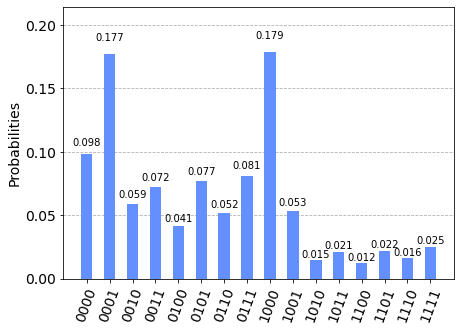

In [655]:
plot_histogram(count)

In [25]:
A

52.54699999999999

In [26]:
E = []
probs = []
shots = 9000
for i in range(1):
    result = execute(H4c_cir, backend = qasm, shots = shots).result()
    count = result.get_counts(H4c_cir)
    probs.append(count['0000']/shots)
    E.append(-A*np.sqrt(count['0000']/shots)) #adding the coefficient for Identity operator
print(E,probs)

[-16.936843600778218] [0.10388888888888889]


## N = 3, JWT

In [20]:
#(5.906709 * I ^ I ^ I) + \
#(9.625* I ^ I ^ I) - \
#(0.218291 * Z ^ I ^ I) - \
#(6.125 * I ^ Z ^ I) - \
#(2.143304 * X ^ X ^ I) - \
#(2.143304 * Y ^ Y ^ I) - \
H3_op = (0.218291 * Z ^ I ^ I) - \
        (6.125 * I ^ Z ^ I) - \
        (2.143304 * X ^ X ^ I) - \
        (2.143304 * Y ^ Y ^ I) - \
        (9.625* I ^ I ^ Z) - \
        (3.913119 * I ^ X ^ X) - \
        (3.913119 * I ^ Y ^ Y)
e,v = np.linalg.eig(H3_op.to_matrix())
v = np.transpose(v)
e,v[5]

(array([ -9.01579923+0.j,   6.97012694+0.j,  17.57738129+0.j,
          9.01579923+0.j,  -6.97012694+0.j, -17.57738129+0.j,
        -15.531709  +0.j,  15.531709  +0.j]),
 array([-0.00000000e+00-0.j,  1.28088738e-01-0.j,  3.48537292e-01-0.j,
         2.61771117e-17-0.j,  9.28501498e-01+0.j,  5.38481460e-17-0.j,
         1.76553047e-17-0.j, -0.00000000e+00-0.j]))

In [27]:
#we already have expectation value of sum upto 5 terms therefore we do it for other terms
betas = [0.21829,6.125,2.143304,2.143304,9.625,3.91312,3.91312]
thetas, A =theta_computer(betas)
len(thetas)

6

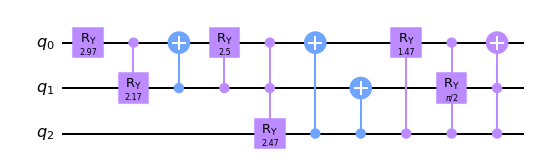

In [45]:
#Qauntum Circuit for V_gate and V_dag
V_cir = QuantumCircuit(3)
V_cir.ry(2*thetas[0],0)
V_cir.cry(2*thetas[1],0,1)
V_cir.cx(1,0)
V_cir.cry(2*thetas[2],1,0)
V_cir.append(RYGate(2*thetas[3]).control(2),[0,1,2])
V_cir.cx(2,0)
V_cir.cx(2,1)
V_cir.cry(2*thetas[4],2,0)
V_cir.append(RYGate(2*thetas[5]).control(2),[0,2,1])
V_cir.ccx(1,2,0)
V_dag = V_cir.inverse()
V_cir.draw('mpl')

array([0.00777355, 0.21811794, 0.0763254 , 0.0763254 , 0.34275676,
       0.13935048, 0.13935048])

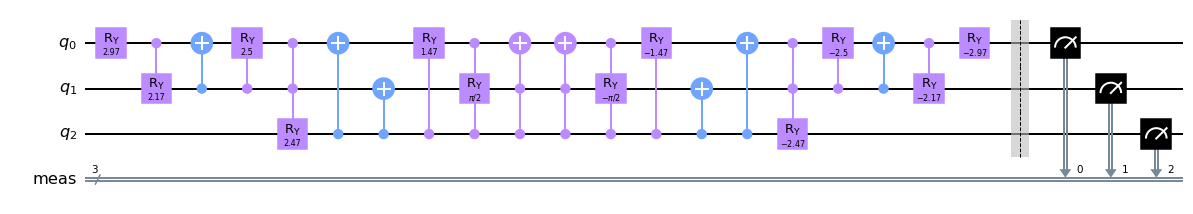

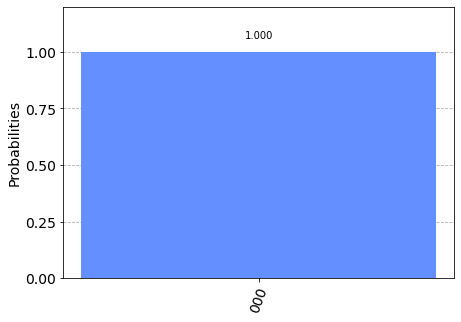

In [44]:
#to test correctness of V
new = np.array(betas)/A
display(new)
V_cir.measure_all()
result = execute(V_cir, backend = simulator, shots = shots).result()
count = result.get_counts(V_cir)
plot_histogram(count)

In [46]:
zii = QuantumCircuit(3)
zii.z(2)
ZII = qc(negate(zii,neg = False)).to_gate(label = 'ZII').control(3)
izi = QuantumCircuit(3)
izi.z(1)
IZI_ = qc(negate(izi)).to_gate(label = 'IZI_').control(3)
xxi = QuantumCircuit(3)
xxi.x([1,2])
XXI_ = qc(negate(xxi)).to_gate(label = 'XXI_').control(3)
yyi = QuantumCircuit(3)
yyi.y([2,1])
YYI_ = qc(negate(yyi)).to_gate(label = 'YYI_').control(3)
iiz = QuantumCircuit(3)
iiz.z(0)
IIZ_ = qc(negate(iiz)).to_gate(label = 'IIZ_').control(3)
ixx = QuantumCircuit(3)
ixx.x([1,0])
IXX_ = qc(negate(ixx)).to_gate(label = 'IXX_').control(3)
iyy = QuantumCircuit(3)
iyy.y([1,0])
IYY_ = qc(negate(iyy)).to_gate(label = 'IYY_').control(3)

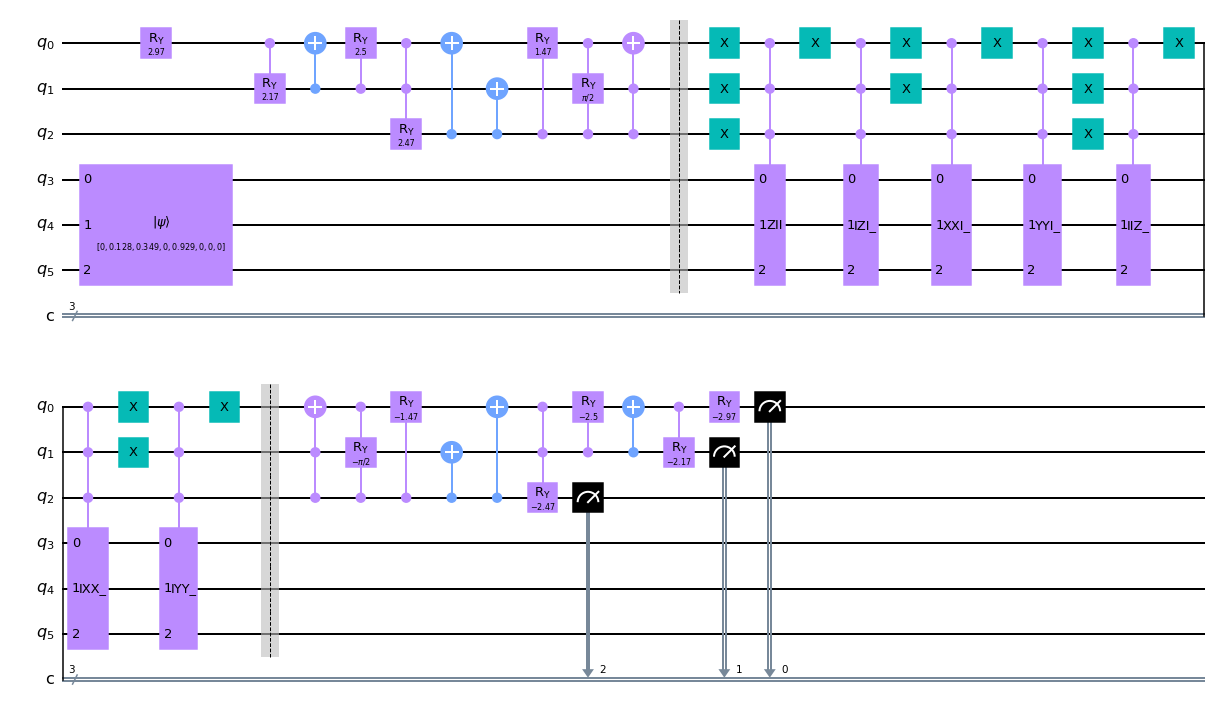

In [47]:
H3_cir = QuantumCircuit(6,3)
H3_cir.compose(V_cir,qubits = [0,1,2],inplace = True)
H3_cir.initialize(v[5],[3,4,5])
H3_cir.barrier()
H3_cir.x([0,1,2])
H3_cir.append(ZII,[0,1,2,3,4,5])
H3_cir.x(0)
H3_cir.append(IZI_,[0,1,2,3,4,5])
H3_cir.x([0,1])
H3_cir.append(XXI_,[0,1,2,3,4,5])
H3_cir.x(0)
H3_cir.append(YYI_,[0,1,2,3,4,5])
H3_cir.x([0,1,2])
H3_cir.append(IIZ_,[0,1,2,3,4,5])
H3_cir.x([0])
H3_cir.append(IXX_,[0,1,2,3,4,5])
H3_cir.x([0,1])
H3_cir.append(IYY_,[0,1,2,3,4,5])
H3_cir.x(0)
H3_cir.barrier()
H3_cir.compose(V_dag,qubits = [0,1,2],inplace = True)
H3_cir.measure([0,1,2],[0,1,2])
H3_cir.draw('mpl')

In [48]:
E = []
probs = []
for i in range(5):
    result = execute(H3_cir, backend = qasm, shots = shots).result()
    count = result.get_counts(H3_cir)
    probs.append(count['000']/shots)
    E.append(-A*np.sqrt(count['000']/shots)+5.906+9.625)
display(E,probs)

[9.86087066292761,
 9.877872588268866,
 9.852388789320006,
 9.571183131862831,
 9.980977789405914]

[0.040771484375, 0.04052734375, 0.0408935546875, 0.0450439453125, 0.0390625]

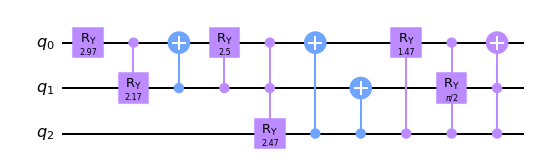

In [98]:
#Qauntum Circuit for V_gate and V_dag
V_cir = QuantumCircuit(3)
V_cir.ry(2*thetas[0],0)
V_cir.cry(2*thetas[1],0,1)
V_cir.cx(1,0)
V_cir.cry(2*thetas[2],1,0)
V_cir.append(RYGate(2*thetas[3]).control(2),[0,1,2])
V_cir.cx(2,0)
V_cir.cx(2,1)
V_cir.cry(2*thetas[4],2,0)
V_cir.append(RYGate(2*thetas[5]).control(2),[0,2,1])
V_cir.ccx(1,2,0)
V_dag = V_cir.inverse()
V_cir.draw('mpl')

array([0.00777358, 0.21811793, 0.07632539, 0.07632539, 0.34275675,
       0.13935047, 0.13935047])

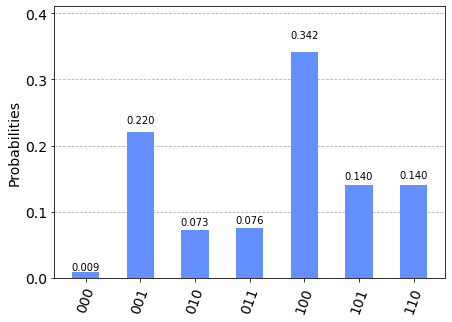

In [94]:
#to test correctness of V
new = np.array(betas)/A
display(new)
V_cir.measure_all()
result = execute(V_cir, backend = qasm, shots = shots).result()
count = result.get_counts(V_cir)
plot_histogram(count)

## Archive

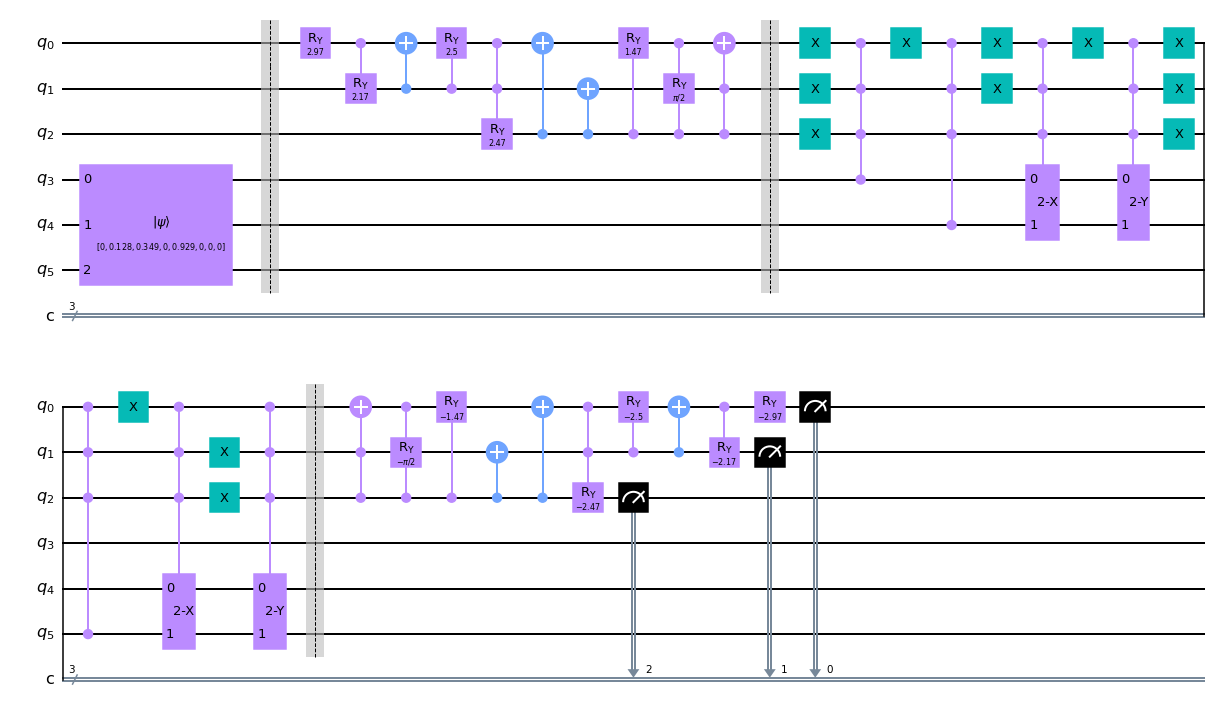

In [102]:
H3_cir = QuantumCircuit(6,3)
H3_cir.initialize(v[5],[3,4,5])
H3_cir.barrier()
H3_cir.compose(V_cir,qubits = [0,1,2],inplace = True)
H3_cir.barrier()
H3_cir.x([0,1,2])
H3_cir.compose(cccz,qubits=[0,1,2,3],inplace = True)
H3_cir.x(0)
H3_cir.compose(cccz,qubits=[0,1,2,4],inplace = True)
H3_cir.x([0,1])
H3_cir.compose(cccxx,qubits=[0,1,2,3,4],inplace = True)
H3_cir.x(0)
H3_cir.compose(cccyy,qubits=[0,1,2,3,4],inplace = True)
H3_cir.x([0,1,2])
H3_cir.compose(cccz,qubits=[0,1,2,5],inplace = True)
H3_cir.x(0)
H3_cir.compose(cccxx,qubits=[0,1,2,4,5],inplace = True)
H3_cir.x([1,2])
H3_cir.compose(cccyy,qubits=[0,1,2,4,5],inplace = True)
#H3_cir.x(2)
H3_cir.barrier()
H3_cir.compose(V_dag,qubits = [0,1,2],inplace = True)
H3_cir.measure([0,1,2],[0,1,2])
H3_cir.draw('mpl')

In [103]:
shots = 8192
E = []
probs = []
for i in range(1):
    result = execute(H3_cir, backend = qasm, shots = shots).result()
    count = result.get_counts(H3_cir)
    probs.append(count['000']/shots)
    E.append(-A*np.sqrt(count['000']/shots)+5.906709+9.625)
display(E,probs)

[4.496895178240371]

[0.1544189453125]

In [85]:
A

28.081139

In [112]:
V_1 = [[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,-1,0,0],
      [0,0,0,0,0,0,-1,0],[0,0,0,0,0,0,0,-1]]
V_2 = [[-1,0,0,0,0,0,0,0],[0,-1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,-1,0,0],
      [0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1]]
V_3 = [[0,0,0,0,0,0,-1,0],[0,0,0,0,0,0,0,-1],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,-1,0,0],[0,0,-1,0,0,0,0,0],[0,0,0,-1,0,0,0,0],
      [-1,0,0,0,0,0,0,0],[0,-1,0,0,0,0,0,0]]
V_4 = [[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,-1,0,0],[0,0,-1,0,0,0,0,0],[0,0,0,-1,0,0,0,0],
      [1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0]]
V_5 = [[-1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,-1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,1,0,0],
      [0,0,0,0,0,0,-1,0],[0,0,0,0,0,0,0,1]]
V_6 = [[0,0,0,-1,0,0,0,0],[0,0,-1,0,0,0,0,0],[0,-1,0,0,0,0,0,0],[-1,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,-1],[0,0,0,0,0,0,-1,0],
      [0,0,0,0,0,-1,0,0],[0,0,0,0,-1,0,0,0]]
V_7 = [[0,0,0,1,0,0,0,0],[0,0,-1,0,0,0,0,0],[0,-1,0,0,0,0,0,0],[1,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,1],[0,0,0,0,0,0,-1,0],
      [0,0,0,0,0,-1,0,0],[0,0,0,0,1,0,0,0]]
g_V1 = qc(V_1).to_gate().control(3)
g_V2 = qc(V_2).to_gate().control(3)
g_V3 = qc(V_3).to_gate().control(3)
g_V4 = qc(V_4).to_gate().control(3)
g_V5 = qc(V_5).to_gate().control(2)
g_V6 = qc(V_6).to_gate().control(2)
g_V7 = qc(V_7).to_gate().control(2)

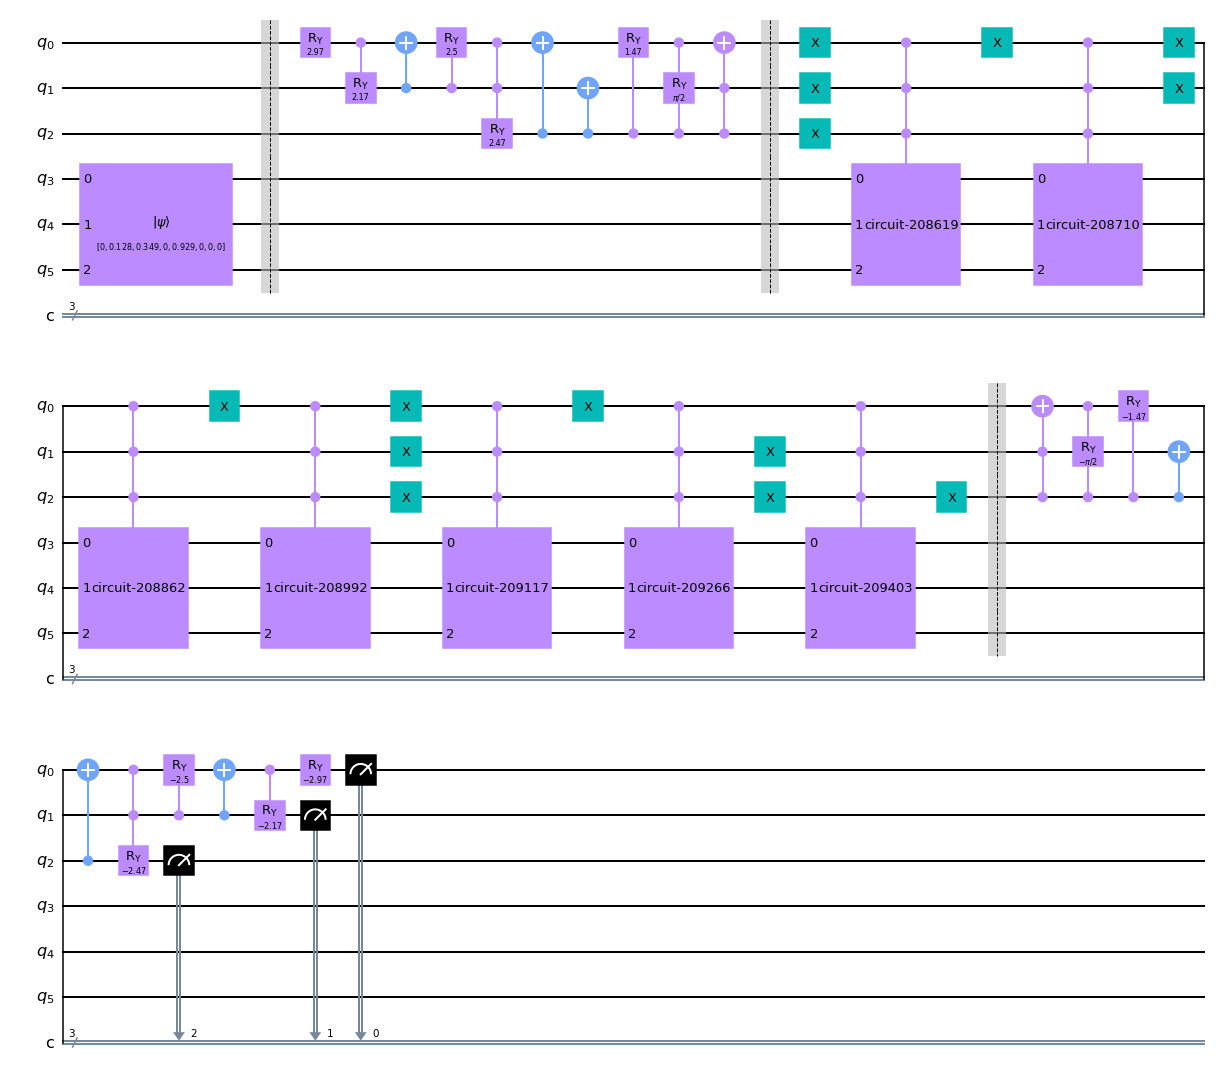

In [99]:
New_H3_cir = QuantumCircuit(6,3)
New_H3_cir.initialize(v[5],[3,4,5])
New_H3_cir.barrier()
New_H3_cir.compose(V_cir,qubits = [0,1,2],inplace = True)
New_H3_cir.barrier()
New_H3_cir.x([0,1,2])
New_H3_cir.append(g_V1,[0,1,2,3,4,5])
New_H3_cir.x(0)
New_H3_cir.append(g_V2,[0,1,2,3,4,5])
New_H3_cir.x([0,1])
New_H3_cir.append(g_V3,[0,1,2,3,4,5])
New_H3_cir.x(0)
New_H3_cir.append(g_V4,[0,1,2,3,4,5])
New_H3_cir.x([0,1,2])
New_H3_cir.append(g_V5,[0,1,2,3,4,5])
New_H3_cir.x(0)
New_H3_cir.append(g_V6,[0,1,2,3,4,5])
New_H3_cir.x([1,2])
New_H3_cir.append(g_V7,[0,1,2,3,4,5])
New_H3_cir.x(2)
New_H3_cir.barrier()
New_H3_cir.compose(V_dag,qubits = [0,1,2],inplace = True)
New_H3_cir.measure([0,1,2],[0,1,2])
New_H3_cir.draw('mpl')

In [101]:
E = []
probs = []
for i in range(1):
    result = execute(New_H3_cir, backend = qasm, shots = shots).result()
    count = result.get_counts(New_H3_cir)
    probs.append(count['000']/shots)
    E.append(-A*np.sqrt(count['000']/shots)+5.906709+9.625)
display(E,probs,A)

[8.0020138279029]

[0.0718994140625]

28.081139

In [155]:
#hamiltonian ref : resonanceJCP2021, n= 2, 3 qubits
c0 = np.exp(-0.09723j)
c1 = np.exp(-0.05311j)
H2_op = (1.19577* c0 * I ^ I) + \
        (0.53529* c1 * Z ^ Z)
e,v = np.linalg.eig(H2_op.to_matrix())
v = np.transpose(v)
print(e)
betas = [1.19577,0.53529]
V0 = [[c0,0,0,0],[0,c0,0,0],[0,0,c0,0],[0,0,0,c0]]
gV0 = qc(V0).to_gate().control(1)
V1 = [[c1,0,0,0],[0,-c1,0,0],[0,0,-c1,0],[0,0,0,c1]]
gV1 = qc(V1).to_gate().control(1)

[1.72465748-0.1444975j  0.655587  -0.08766573j 0.655587  -0.08766573j
 1.72465748-0.1444975j ]


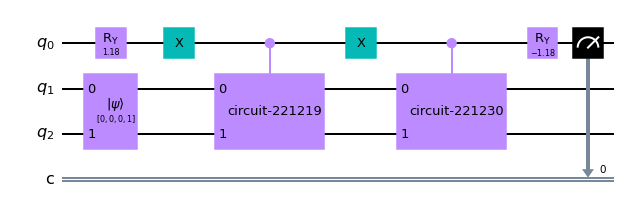

In [156]:
thetas, A = theta_computer(betas,1)
href = QuantumCircuit(3,1)
href.ry(2*thetas[0],0)
href.initialize(v[3],[1,2])
href.x(0)
href.append(gV0,[0,1,2])
href.x(0)
href.append(gV1,[0,1,2])
href.ry(-2*thetas[0],0)
href.measure([0],[0])
href.draw('mpl')

In [157]:
shots = 10000
E = []
p=[]
for i in range(20):
    result = execute(href, backend = simulator, shots = shots).result()
    count = result.get_counts(href)
    p.append(count['0']/shots)
    E.append(-A*np.sqrt(count['0']/shots))

In [158]:
c0 = np.exp(-0.1797j)
c1 = np.exp(-0.15034j)
H2_op = (1.71547* c0 * I ^ I) + \
        (1.28016* c1 * Z ^ Z)

In [159]:
betas = [1.71547,1.28016]
V0 = [[c0,0,0,0],[0,c0,0,0],[0,0,c0,0],[0,0,0,c0]]
gV0 = qc(V0).to_gate().control(1)
V1 = [[c1,0,0,0],[0,-c1,0,0],[0,0,-c1,0],[0,0,0,c1]]
gV1 = qc(V1).to_gate().control(1)

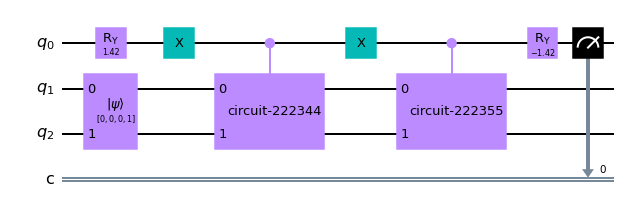

In [160]:
thetas, Adash = theta_computer(betas,1)
href2 = QuantumCircuit(3,1)
href2.ry(2*thetas[0],0)
href2.initialize(v[3],[1,2])
href2.x(0)
href2.append(gV0,[0,1,2])
href2.x(0)
href2.append(gV1,[0,1,2])
href2.ry(-2*thetas[0],0)
href2.measure([0],[0])
href2.draw('mpl')

In [161]:
E_ = []
p_=[]
for i in range(20):
    result = execute(href2, backend = simulator, shots = shots).result()
    count = result.get_counts(href2)
    p_.append(count['0']/shots)
    E_.append(-A*np.sqrt(count['0']/shots))

In [162]:
Adash

2.9956300000000002

In [163]:
prob,prob2


(0.9995300000000003, 0.9997950000000001)

In [164]:
A

1.73106

In [166]:
prob = np.mean(np.array(p))
prob2 = np.mean(np.array(p_))
energy = (1.31441-0.05497j)+(prob**0.25)*sqrt(A)*np.exp(-0.5j*acos(prob2*Adash**2/(2*prob**1.5*A**3)-1/(2*sqrt(prob)*A)-sqrt(prob)*A/2))
energy

(2.098884323848044-1.1110357325727755j)

In [150]:
m = 3
s = 2
betas = [5.906709,0.218291,6.125,2.143304,2.143304,0,0,0]
A = sum(betas)
V_0 = [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
V_1 = [[1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,-1]]
V_2 = [[-1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,1]]
V_3 = [[0,0,0,-1],[0,0,-1,0],[0,-1,0,0],[-1,0,0,0]]
V_4 = [[0,0,0,1],[0,0,-1,0],[0,-1,0,0],[1,0,0,0]]
g_V0 = qc(V_0).to_gate().control(3)
g_V1 = qc(V_1).to_gate().control(3)
g_V2 = qc(V_2).to_gate().control(3)
g_V3 = qc(V_3).to_gate().control(3)
g_V4 = qc(V_4).to_gate().control(3)


In [151]:
# for B
B = np.array([[betas[0],sqrt(betas[0]*betas[1]),sqrt(betas[0]*betas[2]),sqrt(betas[0]*betas[3]),sqrt(betas[0]*betas[4]),sqrt(betas[0]*betas[5]),sqrt(betas[0]*betas[6]),sqrt(betas[0]*betas[7])],
     [sqrt(betas[0]*betas[1]),betas[1],sqrt(betas[2]*betas[1]),sqrt(betas[3]*betas[1]),sqrt(betas[4]*betas[1]),sqrt(betas[5]*betas[1]),sqrt(betas[6]*betas[1]),sqrt(betas[7]*betas[1])],
     [sqrt(betas[2]*betas[0]),sqrt(betas[2]*betas[1]),betas[2],sqrt(betas[2]*betas[3]),sqrt(betas[2]*betas[4]),sqrt(betas[2]*betas[5]),sqrt(betas[2]*betas[6]),sqrt(betas[2]*betas[7])],
    [sqrt(betas[0]*betas[3]),sqrt(betas[3]*betas[1]),sqrt(betas[2]*betas[3]),betas[3],sqrt(betas[3]*betas[4]),sqrt(betas[3]*betas[5]),sqrt(betas[3]*betas[6]),sqrt(betas[3]*betas[7])],
              [sqrt(betas[0]*betas[4]),sqrt(betas[4]*betas[1]),sqrt(betas[2]*betas[4]),sqrt(betas[3]*betas[4]),betas[4],sqrt(betas[4]*betas[5]),sqrt(betas[4]*betas[6]),sqrt(betas[4]*betas[7])],
             [sqrt(betas[0]*betas[5]),sqrt(betas[5]*betas[1]),sqrt(betas[2]*betas[5]),sqrt(betas[3]*betas[5]),sqrt(betas[4]*betas[5]),betas[5],sqrt(betas[5]*betas[6]),sqrt(betas[5]*betas[7])],
              [sqrt(betas[0]*betas[6]),sqrt(betas[6]*betas[1]),sqrt(betas[2]*betas[6]),sqrt(betas[3]*betas[6]),sqrt(betas[4]*betas[6]),sqrt(betas[5]*betas[6]),betas[6],sqrt(betas[6]*betas[7])],
              [sqrt(betas[0]*betas[7]),sqrt(betas[7]*betas[1]),sqrt(betas[2]*betas[7]),sqrt(betas[3]*betas[7]),sqrt(betas[4]*betas[7]),sqrt(betas[5]*betas[7]),sqrt(betas[6]*betas[7]),betas[7]]])*2/A - np.array([[1,0,0,0,0,0,0,0],
              [0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1]])
B_g = qc(B).to_gate()
Bdag = np.transpose(B)
Bdag_g = qc(Bdag).to_gate()

In [152]:
jwt = QuantumCircuit(5,2)
jwt.initialize(v2[0],[3,4])
jwt.append(B_g,[0,1,2])
for i in range(3):
    jwt.x(i)
jwt.append(g_V0,[0,1,2,3,4])
jwt.x(2)
jwt.append(g_V1,[0,1,2,3,4])
jwt.x(1)
jwt.x(2)
jwt.append(g_V2,[0,1,2,3,4])
jwt.x(2)
jwt.append(g_V3,[0,1,2,3,4])
for i in range(3):
    jwt.x(i)
jwt.append(g_V4,[0,1,2,3,4])
jwt.x([1,2])
jwt.append(Bdag_g,[0,1,2])
jwt.measure([3,4],[0,1])

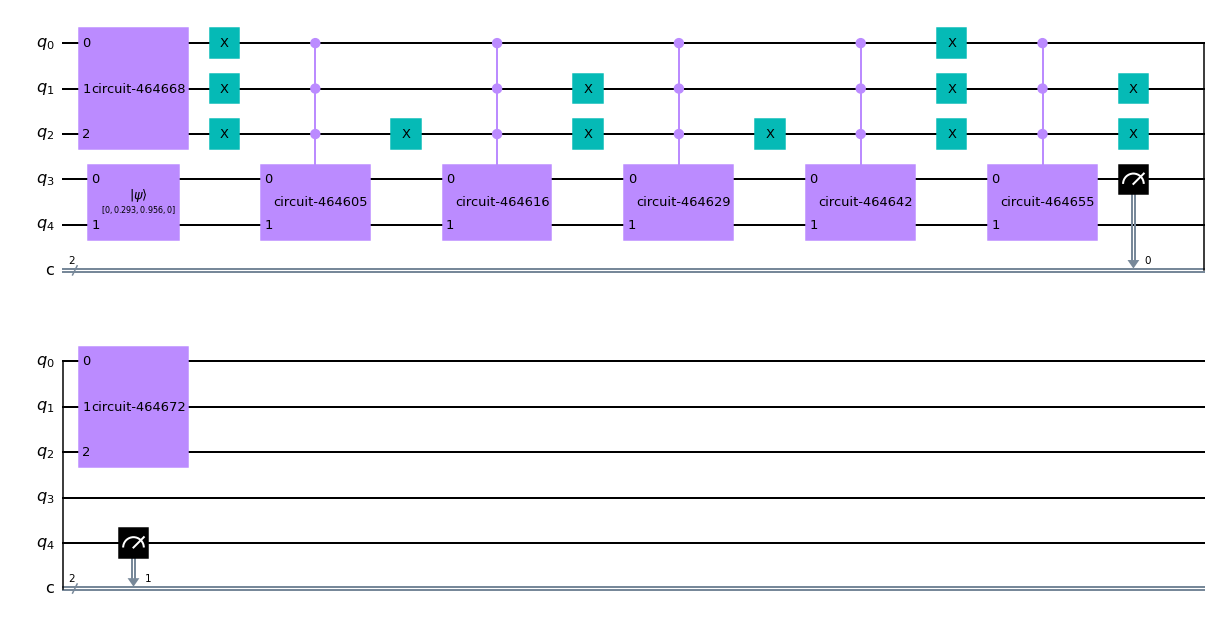

In [153]:
jwt.draw('mpl')

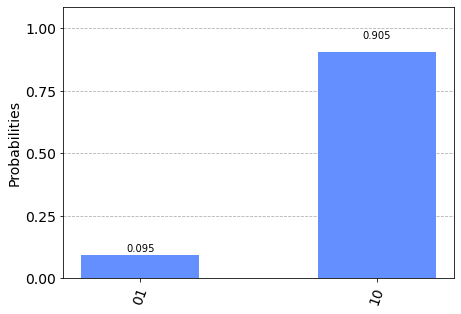

In [158]:
# Checking if the state remains an eigen state
result = execute(jwt, backend = simulator, shots = 10000).result()
count = result.get_counts(jwt)
plot_histogram(count)

Hence the state is 
$0|00\rangle+0.30822|10\rangle+ 0.951|01\rangle+0|11\rangle$

So the state does not remain an eigen state but changes

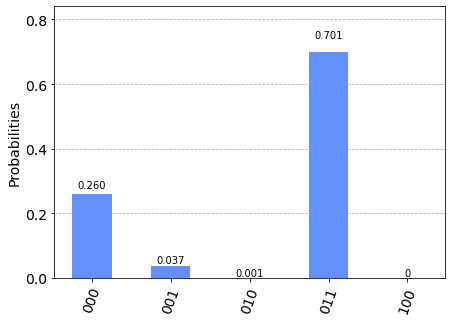

In [93]:
result = execute(jwt, backend = simulator, shots = 40000).result()
count = result.get_counts(jwt)
display(plot_histogram(count))

In [94]:
A

16.536608

Here eigen value for observation where measurement of all ancilla $|0\rangle$ is 
 
 $E = \pm A\sqrt(0.26) = \pm 8.43205$

### 3 body JWT

In [ ]:
H3_op = (15.531709 * I ^ I ^ I) + \
        (0.218291 * Z ^ I ^ I) - \
        (6.125 * I ^ Z ^ I) - \
        (2.143304 * X ^ X ^ I) - \
        (2.143304 * Y ^ Y ^ I) - \
        (9.625 * I ^ I ^ Z) - \
        (3.913119 * I ^ X ^ X) - \
        (3.913119 * I ^ Y ^ Y)

In [99]:
e,v = np.linalg.eig(H3_op.to_matrix())
v = np.transpose(v)
print(e)

[ 6.51590977+0.j 22.50183594+0.j 33.10909029+0.j 24.54750823+0.j
  8.56158206+0.j -2.04567229+0.j  0.        +0.j 31.063418  +0.j]


In [100]:
s = 3
m = 3
betas = [15.531709,0.218291,6.125,2.143304,2.143304,9.625,3.9133119,3.913119]
A = sum(betas)
V_0 = [[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],
      [0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1]]
V_1 = [[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,-1,0,0],
      [0,0,0,0,0,0,-1,0],[0,0,0,0,0,0,0,-1]]
V_2 = [[-1,0,0,0,0,0,0,0],[0,-1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,-1,0,0],
      [0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1]]
V_3 = [[0,0,0,0,0,0,-1,0],[0,0,0,0,0,0,0,-1],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,-1,0,0],[0,0,-1,0,0,0,0,0],[0,0,0,-1,0,0,0,0],
      [-1,0,0,0,0,0,0,0],[0,-1,0,0,0,0,0,0]]
V_4 = [[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,-1,0,0],[0,0,-1,0,0,0,0,0],[0,0,0,-1,0,0,0,0],
      [1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0]]
V_5 = [[-1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,-1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,1,0,0],
      [0,0,0,0,0,0,-1,0],[0,0,0,0,0,0,0,1]]
V_6 = [[0,0,0,-1,0,0,0,0],[0,0,-1,0,0,0,0,0],[0,-1,0,0,0,0,0,0],[-1,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,-1],[0,0,0,0,0,0,-1,0],
      [0,0,0,0,0,-1,0,0],[0,0,0,0,-1,0,0,0]]
V_7 = [[0,0,0,1,0,0,0,0],[0,0,-1,0,0,0,0,0],[0,-1,0,0,0,0,0,0],[1,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,1],[0,0,0,0,0,0,-1,0],
      [0,0,0,0,0,-1,0,0],[0,0,0,0,1,0,0,0]]
g_V0 = qc(V_0).to_gate().control(3)
g_V1 = qc(V_1).to_gate().control(3)
g_V2 = qc(V_2).to_gate().control(3)
g_V3 = qc(V_3).to_gate().control(3)
g_V4 = qc(V_4).to_gate().control(3)
g_V5 = qc(V_5).to_gate().control(3)
g_V6 = qc(V_6).to_gate().control(3)
g_V7 = qc(V_7).to_gate().control(3)

In [101]:
# for B
B = np.identity(len(betas))
for i in range(len(betas)):
    for j in range(len(betas)):
        if i == j:
            B[i][j] = betas[j]
        else:
            B[i][j] = sqrt(betas[i]*betas[j])
B = B*2/A - np.identity(len(betas))
Bdag = np.transpose(B)
B_g = qc(B).to_gate()
Bdag_g = qc(Bdag).to_gate()

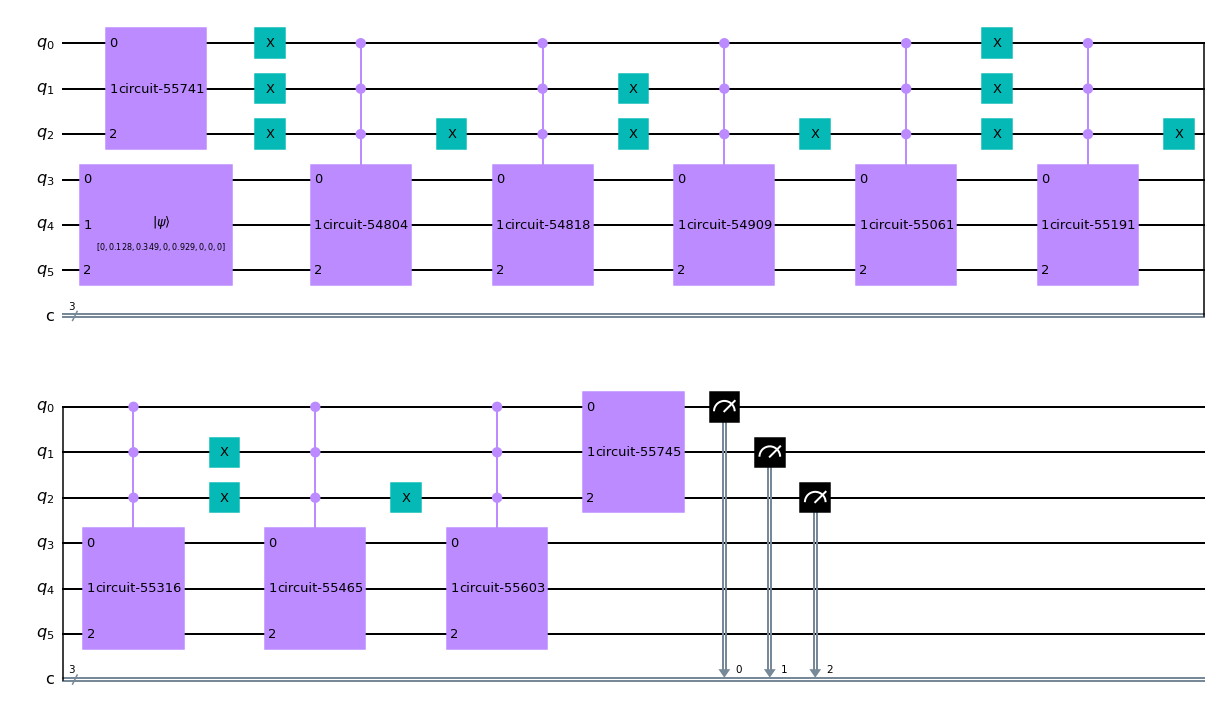

In [105]:
l = list(range(0,6))
threegc = QuantumCircuit(6,3)
threegc.initialize(v[5],[3,4,5])
threegc.append(B_g,[0,1,2])
for i in range(3):
    threegc.x(i)
threegc.append(g_V0,l)
threegc.x(2)
threegc.append(g_V1,l)
threegc.x(1)
threegc.x(2)
threegc.append(g_V2,l)
threegc.x(2)
threegc.append(g_V3,l)
for i in range(3):
    threegc.x(i)
threegc.append(g_V4,l)
threegc.x(2)
threegc.append(g_V5,l)
threegc.x([1,2])
threegc.append(g_V6,l)
threegc.x(2)
threegc.append(g_V7,l)
#for i in range(3):
 #   threegc.x(i)
threegc.append(Bdag_g,[0,1,2])
threegc.measure([0,1,2],[0,1,2])
threegc.draw('mpl')

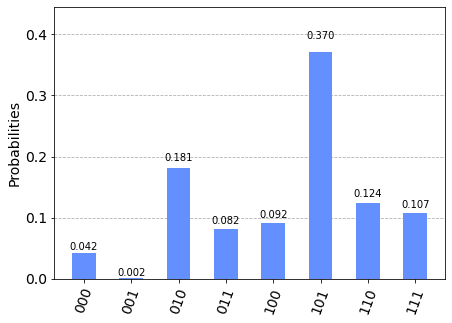

In [108]:
result = execute(threegc, backend = simulator, shots = 1000).result()
count = result.get_counts(threegc)
display(plot_histogram(count))

In [107]:
A

43.6130389

Here eigen value for observation where measurement of all ancilla $|0\rangle$ is 

A = 43.6130389

$E = \pm A\sqrt(0.042) = \pm(8.9380) $

In [476]:
##for other hamiltonians from other references

In [110]:
m = 3
s = 2
betas = [7.7658855,7.984145,1.859145,1.640855,2.143305,2.143305,3.91312,3.91312]
A = sum(betas)
g_V0 = (I^I).to_circuit().to_gate().control(3)
#g_V1 = (Z^I).to_circuit().to_gate().control(3)
#g_V2 = (-1*I^Z).to_circuit().to_gate()
g_V3 = (Z^Z).to_circuit().to_gate().control(3)
#g_V4 = (-1*X^I).to_circuit().to_gate().control(3)
g_V5 = (-1*X^Z).to_circuit().to_gate().control(3)
#g_V6 = (-1*I^X).to_circuit().to_gate().control(3)
g_V7 = (Z^X).to_circuit().to_gate().control(3)

In [111]:
V = [[-1,0,0,0],[0,-1,0,0],[0,0,1,0],[0,0,0,1]]
V2 = [[-1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,1]]
V4 = [[0,0,-1,0],[0,0,0,-1],[-1,0,0,0],[0,-1,0,0]]
V6 = [[0,-1,0,0],[-1,0,0,0],[0,0,0,-1],[0,0,-1,0]]
g_V1 = qc(V).to_gate().control(3)
g_V2 = qc(V2).to_gate().control(3)
g_V4 = qc(V4).to_gate().control(3)
g_V6 = qc(V6).to_gate().control(3)

In [112]:
# for B
B = np.identity(len(betas))
for i in range(len(betas)):
    for j in range(len(betas)):
        if i == j:
            B[i][j] = betas[j]
        else:
            B[i][j] = sqrt(betas[i]*betas[j])
B = B*2/A - np.identity(len(betas))
Bdag = np.transpose(B)
B_g = qc(B).to_gate()
Bdag_g = qc(Bdag).to_gate()

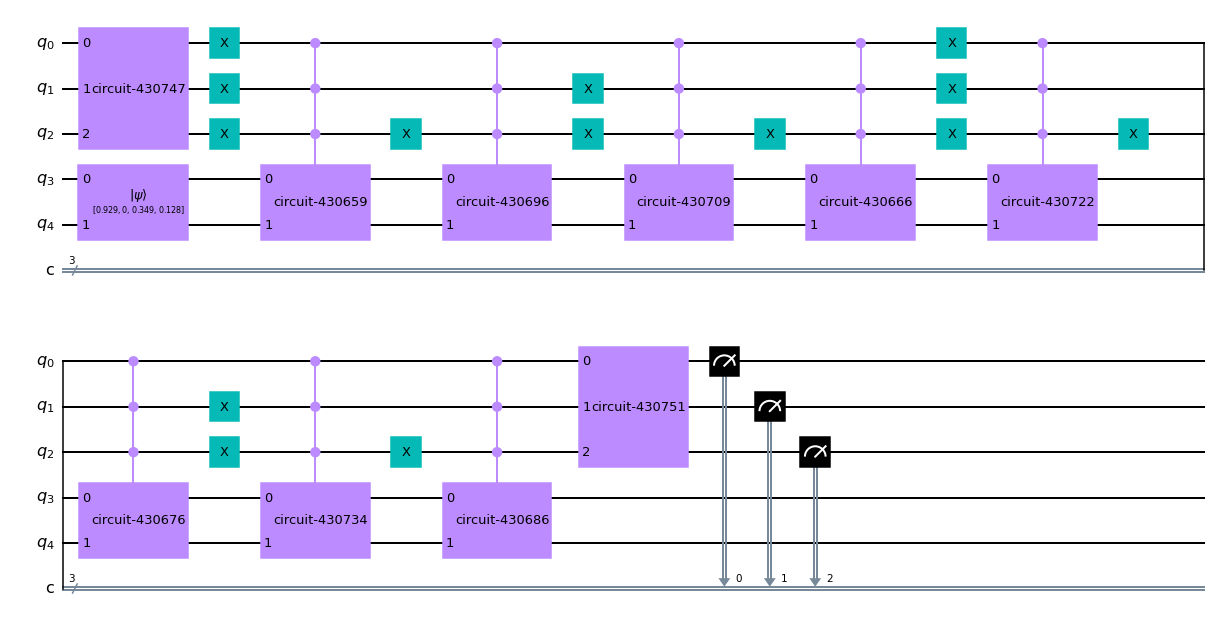

In [113]:
l = list(range(0,5))
three = QuantumCircuit(5,3)
three.initialize(v[0],[3,4])
three.append(B_g,[0,1,2])
for i in range(3):
    three.x(i)
three.append(g_V0,l)
three.x(2)
three.append(g_V1,l)
three.x(1)
three.x(2)
three.append(g_V2,l)
three.x(2)
three.append(g_V3,l)
for i in range(3):
    three.x(i)
three.append(g_V4,l)
three.x(2)
three.append(g_V5,l)
three.x([1,2])
three.append(g_V6,l)
three.x(2)
three.append(g_V7,l)
three.append(Bdag_g,[0,1,2])
three.measure([0,1,2],[0,1,2])
three.draw('mpl')

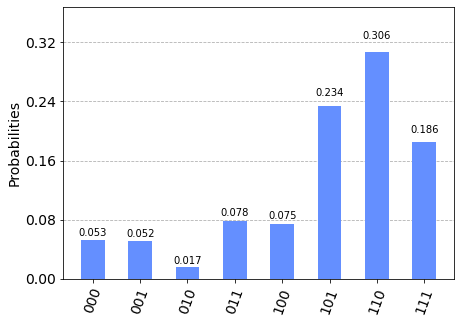

In [114]:
result = execute(three, backend = simulator, shots = 10000).result()
count = result.get_counts(three)
display(plot_histogram(count))

In [115]:
A

31.362880499999996

Here eigen value for observation where measurement of all ancilla $|0\rangle$ is 

A = 31.362880499999996

$E = \pm A\sqrt(0.053) = \pm(7.220277313) $

In [477]:
#ref  : https://doi.org/10.1063/5.0040477
H2_op = (1.19577* c0 * I ^ I) + \
        (0.53529* c1 * Z ^ Z)
#e,v = np.linalg.eig(H2_op.to_matrix())
#v = np.transpose(v)
#print(v)

NameError: name 'c0' is not defined

In [62]:
m = 1
s = 2
betas = [1.19577,0.53529]
A = sum(betas)
c0 = np.exp(-0.09723j)
c1 = np.exp(-0.05311j)
V0 = [[c0,0,0,0],[0,c0,0,0],[0,0,c0,0],[0,0,0,c0]]
gV0 = qc(V0).to_gate().control(1)
V1 = [[c1,0,0,0],[0,-c1,0,0],[0,0,-c1,0],[0,0,0,c1]]
gV1 = qc(V1).to_gate().control(1)

In [63]:
B = np.array([[betas[0],sqrt(betas[0]*betas[1])],
     [sqrt(betas[0]*betas[1]),betas[1]]])*2/A - np.array([[1,0],[0,1]])
B_g = qc(B).to_gate()
Bdag = np.transpose(B)
Bdag_g = qc(Bdag).to_gate()

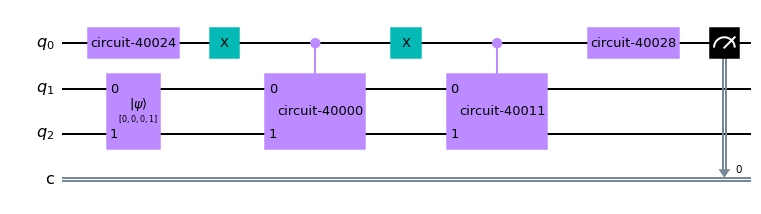

In [64]:
test = QuantumCircuit(3,1)
test.initialize(v[3],[1,2])
test.append(B_g,[0])
test.x(0)
test.append(gV0,[0,1,2])
test.x(0)
test.append(gV1,[0,1,2])
test.x([0])
test.append(Bdag_g,[0])
test.measure([0],[0])
test.draw('mpl')

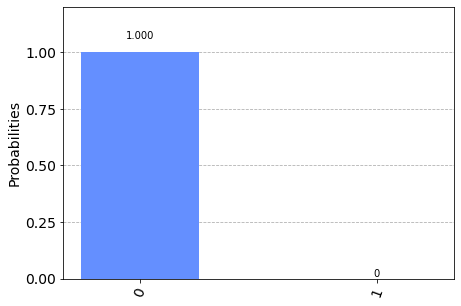

In [65]:
result = execute(test, backend = simulator, shots = 10000).result()
count = result.get_counts(test)
display(plot_histogram(count))

In [17]:
A

1.73106

Therefore |E| = A$\sqrt(P|0\rangle)$ = 1.73106

In [29]:
# When H' = H + H^2
c0 = np.exp(-0.1797j)
c1 = np.exp(-0.15034j)
H2_op = (1.71547* c0 * I ^ I) + \
        (1.28016* c1 * Z ^ Z)
#e,v = np.linalg.eig(H2_op.to_matrix())
#v = np.transpose(v)
#print(e)

In [30]:
betas = [1.71547,1.28016]
A = sum(betas)
V0 = [[c0,0,0,0],[0,c0,0,0],[0,0,c0,0],[0,0,0,c0]]
gV0 = qc(V0).to_gate().control(1)
V1 = [[c1,0,0,0],[0,-c1,0,0],[0,0,-c1,0],[0,0,0,c1]]
gV1 = qc(V1).to_gate().control(1)

In [31]:
B = np.array([[betas[0],sqrt(betas[0]*betas[1])],
     [sqrt(betas[0]*betas[1]),betas[1]]])*2/A - np.array([[1,0],[0,1]])
B_g = qc(B).to_gate()
Bdag = np.transpose(B)
Bdag_g = qc(Bdag).to_gate()

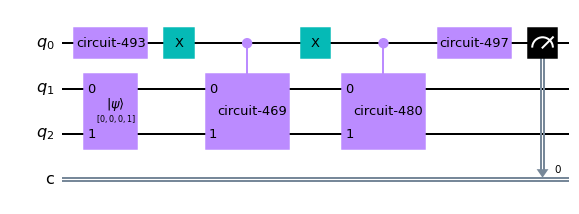

In [32]:
test = QuantumCircuit(3,1)
test.initialize(v[3],[1,2])
test.append(B_g,[0])
test.x(0)
test.append(gV0,[0,1,2])
test.x(0)
test.append(gV1,[0,1,2])
test.append(Bdag_g,[0])
test.measure([0],[0])
test.draw('mpl')

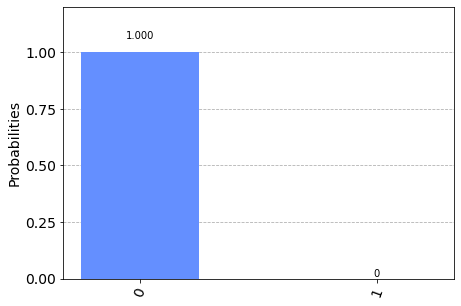

In [33]:
result = execute(test, backend = simulator, shots = 10000).result()
count = result.get_counts(test)
display(plot_histogram(count))

In [34]:
A

2.9956300000000002

Therefore using the Eq(D7)(from pg.11 : Quantum Computing for atomic and molecular resonances) $$Ee^{i\phi} = (1.314 41 - 0.054 97i) + p^{\frac{1}{4}}\sqrt{A}e^{\pm\frac{i}{2}cos^{-1}\Big(\frac{p'A'^2}{2p^{3/2}A^3}-\frac{1}{2\sqrt{p}A}-\frac{\sqrt{p}A}{2}\Big)}$$

where A and A' can be obtained from the absolute value of coefficients in H$_\theta^2$ and H$_\theta^2 + H_\theta^4$ and p and p' can be obtained from their measurement results.

$\implies Ee^{i\phi} = (1.31441 - 0.05497i) + 1.3157e^{0.9322i}$

$\implies Ee^{i\phi} = (2.0982407 + 1.0008872i)$

In [35]:
c3 = np.exp(2.3288j)
c4 = np.exp(3.05283j)
c5 = np.exp(3.11093j)
H3_op = (0.13333* c3 * Y ^ Y ) + \
        (0.13333* c3 * X ^ X ) + \
        (0.25212* c4 * Z ^ I) + \
        (1.06378* c5 * I ^ Z)
e,v = np.linalg.eig(H3_op.to_matrix())
v = np.transpose(v)
print(e)

[-0.8114866 +0.05401956j  0.8114866 -0.05401956j -1.31440741+0.05496267j
  1.31440741-0.05496267j]


In [36]:
betas = [0.13333,0.13333,0.25212,1.06378]
A = sum(betas)
V0 = [[0,0,0,-c3],[0,0,c3,0],[0,c3,0,0],[-c3,0,0,0]]
gV0 = qc(V0).to_gate().control(2)
V1 = [[0,0,0,c3],[0,0,c3,0],[0,c3,0,0],[c3,0,0,0]]
gV1 = qc(V1).to_gate().control(2)
V2 = [[c4,0,0,0],[0,c4,0,0],[0,0,-c4,0],[0,0,0,-c4]]
gV2 = qc(V2).to_gate().control(2)
V3 = [[c5,0,0,0],[0,-c5,0,0],[0,0,c5,0],[0,0,0,-c5]]
gV3 = qc(V3).to_gate().control(2)

In [37]:
B = np.array([[betas[0],sqrt(betas[0]*betas[1]),sqrt(betas[0]*betas[2]),sqrt(betas[0]*betas[3])],
     [sqrt(betas[0]*betas[1]),betas[1],sqrt(betas[1]*betas[2]),sqrt(betas[1]*betas[3])],
             [sqrt(betas[0]*betas[2]),sqrt(betas[1]*betas[2]),betas[2],sqrt(betas[2]*betas[3])],
             [sqrt(betas[0]*betas[3]),sqrt(betas[1]*betas[3]),sqrt(betas[2]*betas[3]),betas[3]]])*2/A - np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
B_g = qc(B).to_gate()
Bdag = np.transpose(B)
Bdag_g = qc(Bdag).to_gate()

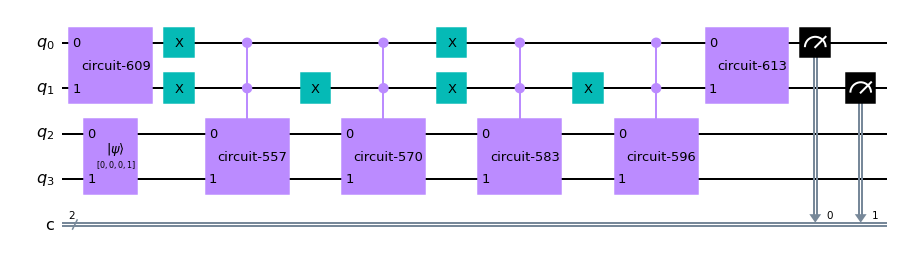

In [38]:
test2 = QuantumCircuit(4,2)
test2.initialize(v[3],[2,3])
test2.append(B_g,[0,1])
test2.x([0,1])
test2.append(gV0,[0,1,2,3])
test2.x(1)
test2.append(gV1,[0,1,2,3])
test2.x([0,1])
test2.append(gV2,[0,1,2,3])
test2.x([1])
test2.append(gV3,[0,1,2,3])
test2.append(Bdag_g,[0,1])
test2.measure([0,1],[0,1])
test2.draw('mpl')

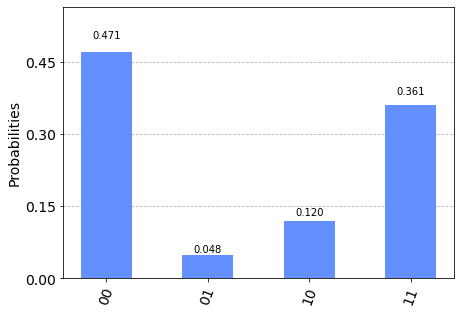

In [39]:
result = execute(test2, backend = simulator, shots = 10000).result()
count = result.get_counts(test2)
display(plot_histogram(count))

In [40]:
A

1.58256

In [41]:
# For phase H' = H + H^3
c3 = np.exp(2.1959j)
c4 = np.exp(3.02245j)
c5 = np.exp(3.01212j)
H3_op = (0.0882* c3 * Y ^ Y ) + \
        (0.0882* c3 * X ^ X ) + \
        (0.86987* c4 * Z ^ I) + \
        (1.40697* c5 * I ^ Z)
e,v = np.linalg.eig(H3_op.to_matrix())
v = np.transpose(v)
print(e)

[-0.52723699+0.10689935j  0.52723699-0.10689935j -2.25889724+0.28504923j
  2.25889724-0.28504923j]


In [42]:
betas = [0.0882,0.0882,0.86987,1.40697]
A = sum(betas)
V0 = [[0,0,0,-c3],[0,0,c3,0],[0,c3,0,0],[-c3,0,0,0]]
gV0 = qc(V0).to_gate().control(2)
V1 = [[0,0,0,c3],[0,0,c3,0],[0,c3,0,0],[c3,0,0,0]]
gV1 = qc(V1).to_gate().control(2)
V2 = [[c4,0,0,0],[0,c4,0,0],[0,0,-c4,0],[0,0,0,-c4]]
gV2 = qc(V2).to_gate().control(2)
V3 = [[c5,0,0,0],[0,-c5,0,0],[0,0,c5,0],[0,0,0,-c5]]
gV3 = qc(V3).to_gate().control(2)

In [43]:
B = np.array([[betas[0],sqrt(betas[0]*betas[1]),sqrt(betas[0]*betas[2]),sqrt(betas[0]*betas[3])],
     [sqrt(betas[0]*betas[1]),betas[1],sqrt(betas[1]*betas[2]),sqrt(betas[1]*betas[3])],
             [sqrt(betas[0]*betas[2]),sqrt(betas[1]*betas[2]),betas[2],sqrt(betas[2]*betas[3])],
             [sqrt(betas[0]*betas[3]),sqrt(betas[1]*betas[3]),sqrt(betas[2]*betas[3]),betas[3]]])*2/A - np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
B_g = qc(B).to_gate()
Bdag = np.transpose(B)
Bdag_g = qc(Bdag).to_gate()

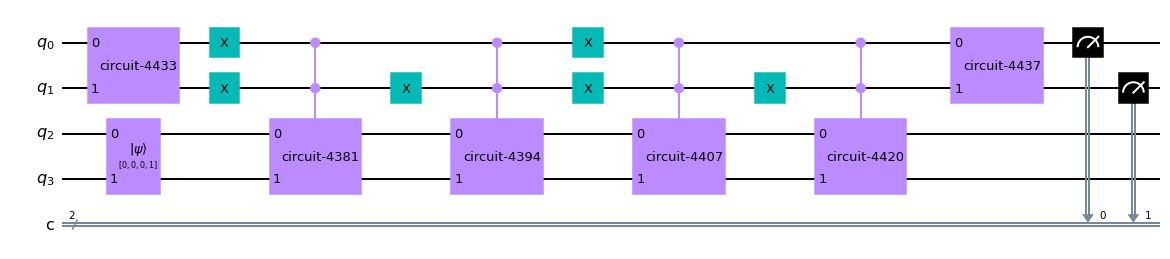

In [44]:
test2 = QuantumCircuit(4,2)
test2.initialize(v[3],[2,3])
test2.append(B_g,[0,1])
test2.x([0,1])
test2.append(gV0,[0,1,2,3])
test2.x(1)
test2.append(gV1,[0,1,2,3])
test2.x([0,1])
test2.append(gV2,[0,1,2,3])
test2.x([1])
test2.append(gV3,[0,1,2,3])
test2.append(Bdag_g,[0,1])
test2.measure([0,1],[0,1])
test2.draw('mpl')

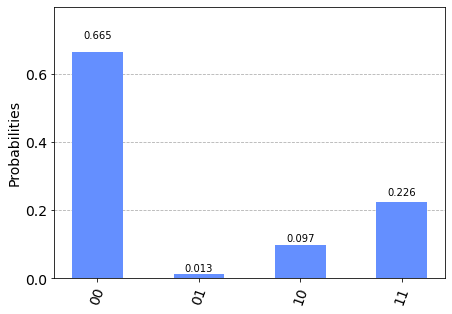

In [45]:
result = execute(test2, backend = simulator, shots = 10000).result()
count = result.get_counts(test2)
display(plot_histogram(count))

In [46]:
A

2.45324

Therefore using the Eq(D7)(from pg.11 : Quantum Computing for atomic and molecular resonances) $$Ee^{i\phi} = (1.314 41 - 0.054 97i) + \sqrt{p}Ae^{\pm\frac{i}{2}cos^{-1}\Big(\frac{p'A'^2}{2p^2A^4}-\frac{1}{2pA^2}-\frac{pA^2}{2}\Big)}$$

where A and A' can be obtained from the absolute value of coefficients in H$_\theta$ and H$_\theta + H_\theta^3$ and p and p' can be obtained from their measurement results.

$\implies Ee^{i\phi} = (1.31441 - 0.05497i) + 1.0907e^{1.1582i}$

$\implies Ee^{i\phi} = (1.7516 + 0.9442i)$

In [47]:
c6 = np.exp(-0.04180j)
c7 = np.exp(2.32888j)
c8 = np.exp(3.05283j)
c9 = np.exp(3.11093j)
H5 = (1.31556*c6 * I ^ I) + \
        (0.13333*c7 * Y ^ Y) + \
        (0.25212*c8 * Z ^ I) + \
        (1.06378*c9 * I ^ Z) + \
        (0.13333*c7 *X ^ X)
e,v = np.linalg.eig(H5.to_matrix())
v = np.transpose(v)
print(e)

[5.02917273e-01-9.54915656e-04j 2.12590446e+00-1.08993876e-01j
 3.46139995e-06-1.17238668e-05j 2.62881827e+00-1.09937068e-01j]


In [48]:
betas = [1.31556,0.13333,0.25212,1.06378,0.13333,0,0,0]
A = sum(betas)
V0 = [[c6,0,0,0],[0,c6,0,0],[0,0,c6,0],[0,0,0,c6]]
gV0 = qc(V0).to_gate().control(3)
V1 = [[0,0,0,-c7],[0,0,c7,0],[0,c7,0,0],[-c7,0,0,0]]
gV1 = qc(V1).to_gate().control(3)
V2 = [[c8,0,0,0],[0,c8,0,0],[0,0,-c8,0],[0,0,0,-c8]]
gV2 = qc(V2).to_gate().control(3)
V3 = [[c9,0,0,0],[0,-c9,0,0],[0,0,c9,0],[0,0,0,-c9]]
gV3 = qc(V3).to_gate().control(3)
V4 = [[0,0,0,c7],[0,0,c7,0],[0,c7,0,0],[c7,0,0,0]]
gV4 = qc(V4).to_gate().control(3)


In [49]:
# for B
B = np.identity(len(betas))
for i in range(len(betas)):
    for j in range(len(betas)):
        if i == j:
            B[i][j] = betas[j]
        else:
            B[i][j] = sqrt(betas[i]*betas[j])
B = B*2/A - np.identity(len(betas))
Bdag = np.transpose(B)
B_g = qc(B).to_gate()
Bdag_g = qc(Bdag).to_gate()

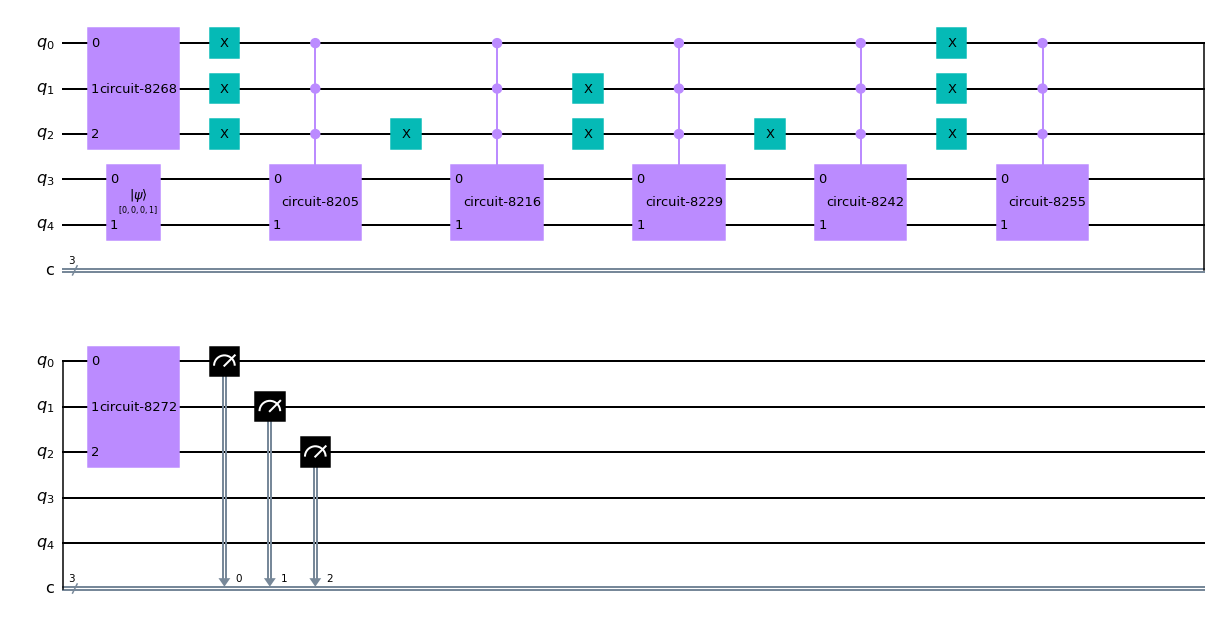

In [55]:
test3 = QuantumCircuit(5,3)
test3.initialize(v[3],[3,4])
test3.append(B_g,[0,1,2])
test3.x([0,1,2])
test3.append(gV0,[0,1,2,3,4])
test3.x(2)
test3.append(gV1,[0,1,2,3,4])
test3.x([1,2])
test3.append(gV2,[0,1,2,3,4])
test3.x([2])
test3.append(gV3,[0,1,2,3,4])
test3.x([0,1,2])
test3.append(gV4,[0,1,2,3,4])
test3.append(Bdag_g,[0,1,2])
test3.measure([0,1,2],[0,1,2])
test3.draw('mpl')

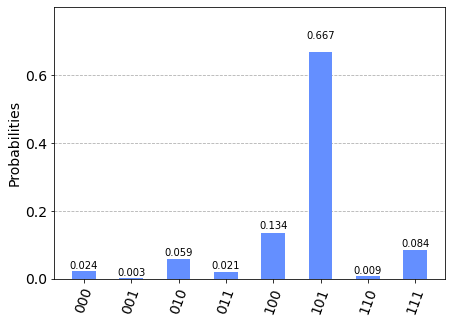

In [56]:
result = execute(test3, backend = simulator, shots = 10000).result()
count = result.get_counts(test3)
display(plot_histogram(count))

In [57]:
A

2.89812

In [58]:
# For Phase H' = II + H
c6 = np.exp(0.0237486j)
betas = [2.3150637,0.13333,0.25212,1.06378,0.13333,0,0,0]
A = sum(betas)
V0 = [[c6,0,0,0],[0,c6,0,0],[0,0,c6,0],[0,0,0,c6]]
gV0 = qc(V0).to_gate().control(3)

In [59]:
# for B
B = np.identity(len(betas))
for i in range(len(betas)):
    for j in range(len(betas)):
        if i == j:
            B[i][j] = betas[j]
        else:
            B[i][j] = sqrt(betas[i]*betas[j])
B = B*2/A - np.identity(len(betas))
Bdag = np.transpose(B)
B_g = qc(B).to_gate()
Bdag_g = qc(Bdag).to_gate()

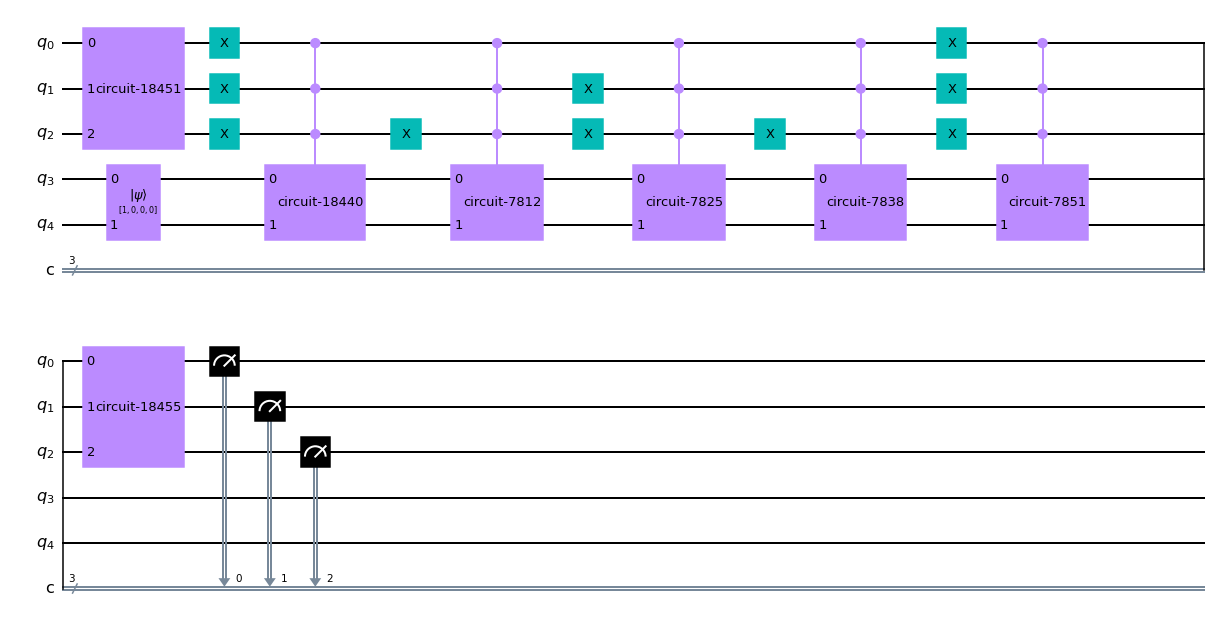

In [30]:
test3 = QuantumCircuit(5,3)
test3.initialize(v[2],[3,4])
test3.append(B_g,[0,1,2])
test3.x([0,1,2])
test3.append(gV0,[0,1,2,3,4])
test3.x(2)
test3.append(gV1,[0,1,2,3,4])
test3.x([1,2])
test3.append(gV2,[0,1,2,3,4])
test3.x([2])
test3.append(gV3,[0,1,2,3,4])
test3.x([0,1,2])
test3.append(gV4,[0,1,2,3,4])
test3.append(Bdag_g,[0,1,2])
test3.measure([0,1,2],[0,1,2])
test3.draw('mpl')

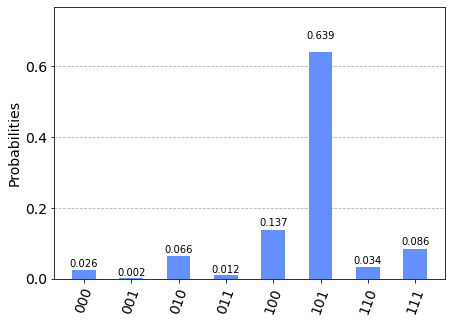

In [31]:
result = execute(test3, backend = simulator, shots = 10000).result()
count = result.get_counts(test3)
display(plot_histogram(count))

In [32]:
A

3.8976237

Therefore according to Appendix(D1), Eq(D2) of the same paper we have:
$$ Ee^{i\phi} = \sqrt{p}Ae^{\pm i cos^{-1}\Big(\frac{p'A'^2-x^2-pA^2}{2xA\sqrt{P}}\Big)}$$

where A and A' can be obtained from the absolute value of coefficients in H$_\theta^2$ and $xII + H_\theta$ and p and p' can be obtained from their measurement results. Here x = 1

$\implies Ee^{i\phi} = -0.4074996+0.2095747i$


## N = 3, H$_3$ GC

In [50]:
#(7.765855*I^I)
H3 = -(7.984145*Z^I)-(1.859145*I^Z)-(2.143305*X^I)-(2.143305*X^Z)-(3.91312*I^X)+(3.91312*Z^X)+(1.640855*Z^Z)
e,v = np.linalg.eig(H3.to_matrix())
v = np.transpose(v)
print(e)

[-9.81152704+0.j  0.79572674+0.j 16.7816553 +0.j -7.765855  +0.j]


In [51]:
betas = [7.984145,1.859145,2.143305,2.143305,3.91312,3.91312,1.640855]
thetas, A = theta_computer(betas)

In [54]:
ZI_ = qc(negate(zi)).to_gate(label = 'ZI_').control(3)
IZ_ = qc(negate(iz)).to_gate(label = 'IZ_').control(3)
xi = QuantumCircuit(2)
xi.x(0)
XI_ = qc(negate(xi)).to_gate(label = 'XI_').control(3)
xz = QuantumCircuit(2)
xz.x(0)
xz.z(1)
XZ_ = qc(negate(xz)).to_gate(label = 'XZ_').control(3)
ix = QuantumCircuit(2)
ix.x(1)
IX_ = qc(negate(ix)).to_gate(label = 'IX_').control(3)
zx = QuantumCircuit(2)
zx.z(0)
zx.x(1)
ZX = qc(negate(zx,neg = False)).to_gate(label = 'ZX').control(3)
zz = QuantumCircuit(2)
zz.z([0,1])
ZZ=qc(negate(zz,neg = False)).to_gate(label = 'ZZ').control(3)

In [56]:
ccry = RYGate(2*thetas[3]).control(2) 
ccry2 = RYGate(2*thetas[5]).control(2) 

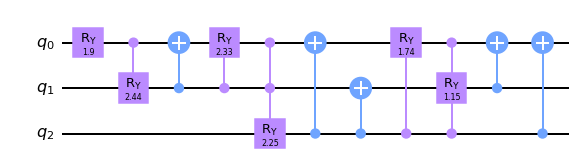

In [60]:
#Qauntum Circuit for V_gate and V_dag
V_cir = QuantumCircuit(3)
V_cir.ry(2*thetas[0],0)
V_cir.cry(2*thetas[1],0,1)
V_cir.cx(1,0)
V_cir.cry(2*thetas[2],1,0)
V_cir.append(ccry,[0,1,2])
V_cir.cx(2,0)
V_cir.cx(2,1)
V_cir.cry(2*thetas[4],2,0)
V_cir.append(ccry2,[2,0,1])
V_cir.cx(1,0)
V_cir.cx(2,0)
V_dag = V_cir.inverse()
V_cir.draw('mpl')

array([0.33835431, 0.07878736, 0.09082957, 0.09082957, 0.16583128,
       0.16583128, 0.06953661])

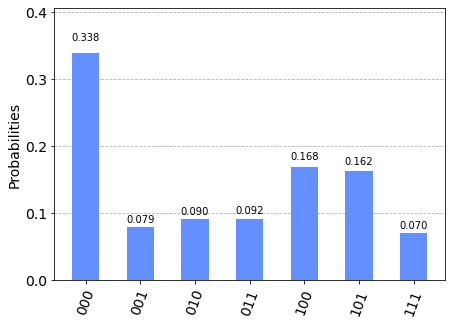

In [58]:
#to test correctness of V
shots = 20000
new = np.array(betas)/A
display(new)
V_cir.measure_all()
result = execute(V_cir, backend = simulator, shots = shots).result()
count = result.get_counts(V_cir)
plot_histogram(count)

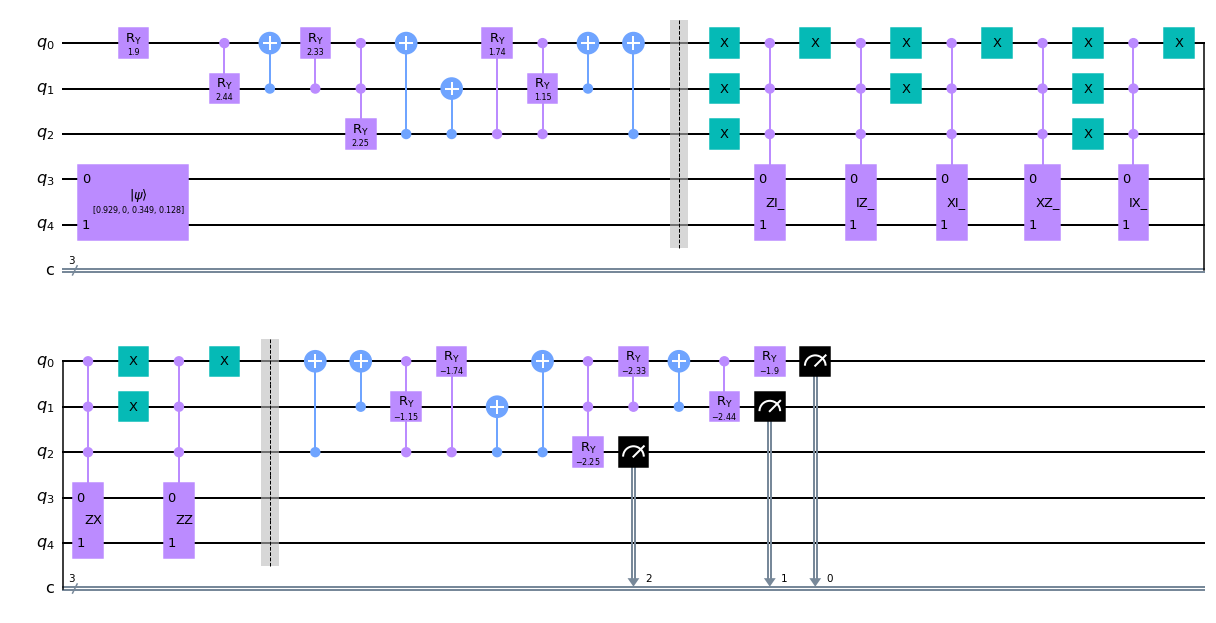

In [61]:
gc3 =QuantumCircuit(5,3)
#state preparation
gc3.initialize(v[0],[3,4])
#V gate
gc3.compose(V_cir,[0,1,2],inplace = True)
gc3.barrier()
gc3.x([0,1,2])
gc3.append(ZI_,[0,1,2,3,4])
gc3.x([0])
gc3.append(IZ_,[0,1,2,3,4])
gc3.x([0,1])
gc3.append(XI_,[0,1,2,3,4])
gc3.x(0)
gc3.append(XZ_,[0,1,2,3,4])
gc3.x([0,1,2])
gc3.append(IX_,[0,1,2,3,4])
gc3.x(0)
gc3.append(ZX,[0,1,2,3,4])
gc3.x([0,1])
gc3.append(ZZ,[0,1,2,3,4])
gc3.x([0])
gc3.barrier()
gc3.compose(V_dag,[0,1,2],inplace = True)
gc3.measure([0,1,2],[0,1,2])
gc3.draw('mpl')

In [63]:
E = []
probs = []
#shots = 10000
for shots in [8192,10000,20000]:
    for i in range(5):
        result = execute(gc3, backend = qasm, shots = shots).result()
        count = result.get_counts(gc3)
        probs.append(count['000']/shots)
        E.append(-A*np.sqrt(count['000']/shots)+7.765855)
display(E,probs)

[-1.506861700629301,
 -1.4738168715895146,
 -1.5907793993468609,
 -1.5251691551761564,
 -1.4110742158137377,
 -1.6581833381164657,
 -1.5810573965302517,
 -1.5870127411271504,
 -1.5092950113550092,
 -1.5272875598102633,
 -1.6374808909042446,
 -1.5870127411271504,
 -1.5422547825214679,
 -1.4294068002213116,
 -1.540759143436933]

[0.1544189453125,
 0.1533203125,
 0.1572265625,
 0.155029296875,
 0.1512451171875,
 0.1595,
 0.1569,
 0.1571,
 0.1545,
 0.1551,
 0.1588,
 0.1571,
 0.1556,
 0.15185,
 0.15555]

In [447]:
mean = np.mean(E)
mean_p = np.mean(probs)
print('deltaProb','\t\t\t','deltaE' )
for i in range(len(E)):
    print(abs(probs[i]-mean_p),'\t\t',abs(E[i]-mean))

deltaProb 			 deltaE
0.00540999999999997 		 0.1522016836867337
0.0008900000000000297 		 0.02521085823510205
0.003290000000000043 		 0.09197215754791443
0.0019099999999999673 		 0.0532465130990083
0.0009099999999999664 		 0.02515482417285675
0.004390000000000033 		 0.12242320153227304
0.005609999999999976 		 0.15788646915621563
0.0019099999999999673 		 0.0532465130990083
0.0009900000000000186 		 0.028001497392713404
0.0034099999999999686 		 0.09553419593067325
0.0034099999999999686 		 0.09553419593067325
0.005390000000000034 		 0.15002630019657204
0.001490000000000019 		 0.041943002184357425
0.0029900000000000204 		 0.0836512881949556
0.00019000000000002348 		 0.005654481403324141
0.0011099999999999721 		 0.03076679736192922
0.0005900000000000349 		 0.016834252581050535
0.0008900000000000297 		 0.02521085823510205
0.002390000000000031 		 0.06698881353041308
0.00019000000000002348 		 0.005654481403324141


## Test(seperate positive and negative coeff sums) 
## Note : You cannot separate the pos, and negative part and then add them, look at their separate eigen values

In [414]:
#neg
H3_1 = -(7.984145*Z^I)-(1.859145*I^Z)-(2.143305*X^I)-(2.143305*X^Z)-(3.91312*I^X)#+(3.91312*Z^X)+(1.640855*Z^Z)
e1,v1 = np.linalg.eig(H3_1.to_matrix())
v1 = np.transpose(v1)
#pos
H3_2 = (3.91312*Z^X)+(1.640855*Z^Z)
e2,v2 = np.linalg.eig(H3_2.to_matrix())
v2 = np.transpose(v2)
print(e1,e2)

[-13.04810698+0.j  -4.13863499+0.j   4.60974174+0.j  12.57700023+0.j] [ 4.24321968+0.j -4.24321968+0.j -4.24321968+0.j  4.24321968+0.j]


In [ ]:
#neg
betas_1 = [7.984145,1.859145,2.143305,2.143305,3.91312,0,0,0]
gammas1 = []
for beta in betas_1:
    gammas1.append(np.sqrt(beta/sum(betas_1)))
#pos
betas_2 = [3.91312,1.640855]
gammas2 = []
for beta in betas_2:
    gammas2.append(np.sqrt(beta/sum(betas_2)))

array([0.44250602, 0.10303957, 0.1187886 , 0.1187886 , 0.21687722,
       0.        , 0.        , 0.        ])

array([0.70456205, 0.29543795])

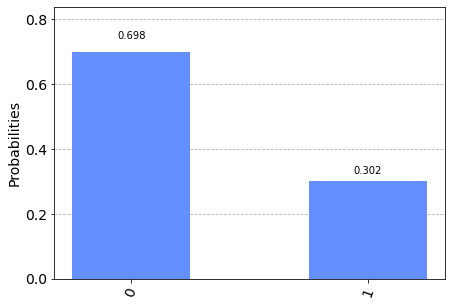

In [ ]:
#neg
#for Vdag
Vdag1 =QuantumCircuit(3)
Vdag1.initialize(gammas1,[0,1,2])
transpilecir1 = transpile(Vdag1,basis_gates = ['x','y','z','rx','ry','rz','cx'])
#transpilecir.draw('mpl')
V_dag1 = transpilecir1.inverse()
V_dag1.draw('mpl')
#transpilecir1.measure_all()
new1 = np.array(betas_1)/sum(betas_1)
display(new1)
result = execute(transpilecir1, backend = simulator, shots = shots).result()
count1 = result.get_counts(transpilecir1)
#pos
#for Vdag
Vdag2 =QuantumCircuit(1)
Vdag2.initialize(gammas2,[0])
transpilecir2 = transpile(Vdag2,basis_gates = ['ry'])
#transpilecir.draw('mpl')
V_dag2 = transpilecir2.inverse()
V_dag2.draw('mpl')
transpilecir2.measure_all()
new2 = np.array(betas_2)/sum(betas_2)
display(new2)
result = execute(transpilecir2, backend = simulator, shots = shots).result()
count2 = result.get_counts(transpilecir2)
plot_histogram(count2)

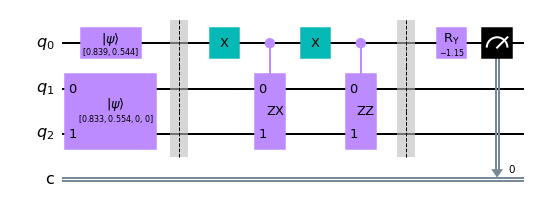

In [ ]:
#neg
test1 =QuantumCircuit(5,3)
test1.initialize(gammas1,[0,1,2])
test1.initialize(v1[0],[3,4])
test1.barrier()
test1.x([0,1,2])
test1.append(gZI_,[0,1,2,3,4])
test1.x([0])
test1.append(gIZ_,[0,1,2,3,4])
test1.x([0,1])
test1.append(gXI_,[0,1,2,3,4])
test1.x(0)
test1.append(gXZ_,[0,1,2,3,4])
test1.x([0,1,2])
test1.append(gIX_,[0,1,2,3,4])
test1.x([0,1])
test1.barrier()
test1.compose(V_dag1,[0,1,2],inplace = True)
test1.measure([0,1,2],[0,1,2])
#pos
test2 = QuantumCircuit(3,1)
test2.initialize(gammas2,0)
test2.initialize(v2[0],[1,2])
test2.barrier()
test2.x(0)
test2.append(gZX,[0,1,2])
test2.x(0)
test2.append(gZZ,[0,1,2])
test2.barrier()
test2.compose(V_dag2,[0],inplace = True)
test2.measure([0],[0])
test2.draw('mpl')

In [ ]:
#neg
E1 = []
probs1 = []
shots = 10000
for i in range(1):
    result = execute(test1, backend = simulator, shots = shots).result()
    count = result.get_counts(test1)
    probs1.append(count['000']/shots)
    E1.append(-sum(betas_1)*np.sqrt(count['000']/shots))
#pos
E2 = []
probs2 = []
for i in range(1):
    result = execute(test2, backend = simulator, shots = shots).result()
    count = result.get_counts(test2)
    probs2.append(count['0']/shots)
    E2.append(-sum(betas_2)*np.sqrt(count['0']/shots))
display(E1,probs1,E2,probs2)

[-12.157300650517021]

[0.454]

[-4.217731180145368]

[0.5767]

### test3(inherit V and V_dag from test number2)

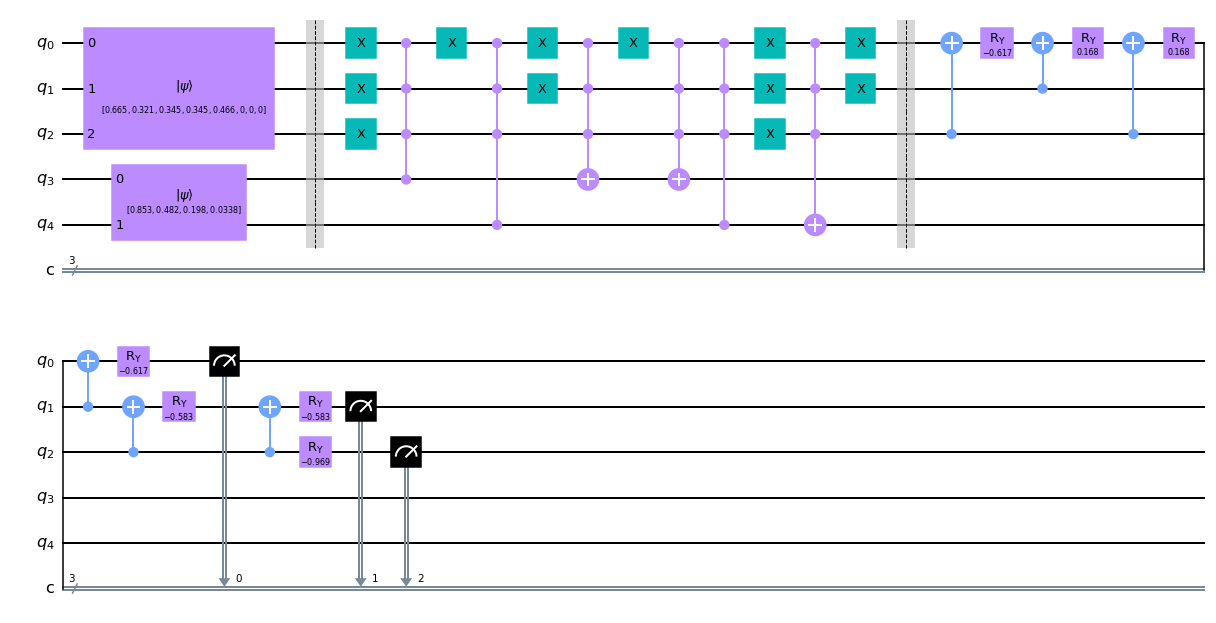

In [ ]:
test3 =QuantumCircuit(5,3)
test3.initialize(gammas1,[0,1,2])
test3.initialize(v1[0],[3,4])
test3.barrier()
test3.x([0,1,2])
test3.compose(cccz,[0,1,2,3],inplace = True)
test3.x([0])
test3.compose(cccz,[0,1,2,4],inplace = True)
test3.x([0,1])
test3.compose(cccx,[0,1,2,3],inplace = True)
test3.x(0)
test3.compose(cccx,[0,1,2,3],inplace = True)
test3.compose(cccz,[0,1,2,4],inplace = True)
test3.x([0,1,2])
test3.compose(cccx,[0,1,2,4],inplace = True)
test3.x([0,1])
test3.barrier()
test3.compose(V_dag1,[0,1,2],inplace = True)
test3.measure([0,1,2],[0,1,2])
#pos
test4 = QuantumCircuit(3,1)
test4.initialize(gammas2,0)
test4.initialize(v2[0],[1,2])
test4.barrier()
test4.x(0)
test4.cx([0],[2])
test4.cz([0],[1])
test4.x(0)
test4.cz([0],[1])
test4.cz([0],[2])
test4.barrier()
test4.compose(V_dag2,[0],inplace = True)
test4.measure([0],[0])
test3.draw('mpl')

In [ ]:
#neg
E1 = []
probs1 = []
shots = 10000
for i in range(1):
    result = execute(test3, backend = simulator, shots = shots).result()
    count = result.get_counts(test3)
    probs1.append(count['000']/shots)
    E1.append(-sum(betas_1)*np.sqrt(count['000']/shots))
#pos
E2 = []
probs2 = []
for i in range(1):
    result = execute(test4, backend = simulator, shots = shots).result()
    count = result.get_counts(test4)
    probs2.append(count['0']/shots)
    E2.append(-sum(betas_2)*np.sqrt(count['0']/shots))
display(E1,probs1,E2,probs2)

[-12.267926835616558]

[0.4623]

[-4.261748541550522]

[0.5888]

## test over

# Central

## GC, N = 2

In [35]:
#(7.858535*I)
H2c = (-7.863675*Z)-(0.75556*X)
e,v = np.linalg.eig(H2c.to_matrix())
v = np.transpose(v)
print(e)

[-7.89988958+0.j  7.89988958+0.j]


In [36]:
betas = [7.863675,0.75556]
thetas, A =theta_computer(betas)
thetas[0]

0.3005796268688847

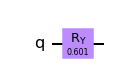

In [37]:
#Quantum Circuit for V_gate and V_dag
V_cir = QuantumCircuit(1)
V_cir.ry(2*thetas[0],0)
V_dag = V_cir.inverse()
V_cir.draw('mpl')

array([0.91234025, 0.08765975])

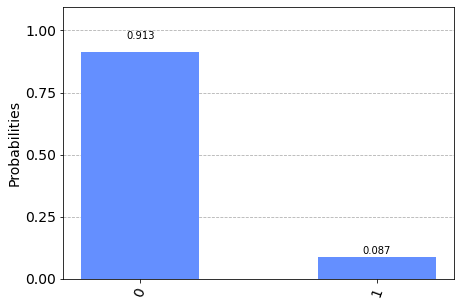

In [491]:
#to test correctness of V
new = np.array(betas)/A
display(new)
V_cir.measure_all()
result = execute(V_cir, backend = simulator, shots = shots).result()
count = result.get_counts(V_cir)
plot_histogram(count)

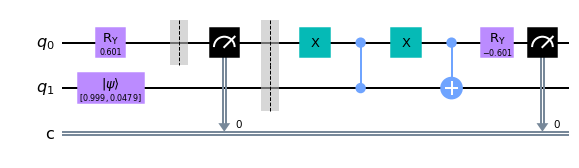

In [492]:
H2c_cir = QuantumCircuit(2,1)
H2c_cir.initialize(v[0],1)
H2c_cir.compose(V_cir,[0],inplace = True)
H2c_cir.barrier()
H2c_cir.x(0)
H2c_cir.cz(0,1)
H2c_cir.x(0)
H2c_cir.cx(0,1)
H2c_cir.compose(V_dag,[0],inplace = True)
H2c_cir.measure(0,0)
H2c_cir.draw('mpl')

In [493]:
E = []
probs = []
shots = 10000
for i in range(20):
    result = execute(H2c_cir, backend = qasm, shots = shots).result()
    count = result.get_counts(H2c_cir)
    probs.append(count['0']/shots)
    E.append(-A*np.sqrt(count['0']/shots)+7.858535)

In [475]:
print(E,probs)

[-0.032185167691734407, -0.03453856932707744, -0.042064743689465445, -0.0594416224920975, -0.06928723183014807, -0.047234832417953676, -0.02841826442529971, -0.031243610482047046, -0.03877292495749085, -0.032185167691734407, -0.08146011905781503, -0.024178346585818744, -0.007195820546516352, -0.04018387239898935, -0.05381005945924411, -0.04958375537807047, -0.07303472541302991, -0.04488521135009549, -0.03077278973805253, -0.03030194089458238] [0.8381, 0.8386, 0.8402, 0.8439, 0.846, 0.8413, 0.8373, 0.8379, 0.8395, 0.8381, 0.8486, 0.8364, 0.8328, 0.8398, 0.8427, 0.8418, 0.8468, 0.8408, 0.8378, 0.8377]


In [248]:
mean = np.mean(E)
mean_p = np.mean(probs)
print('deltaProb','\t\t\t','deltaE' )
for i in range(len(E)):
    print(abs(probs[i]-mean_p),'\t\t',abs(E[i]-mean))

deltaProb 			 deltaE
0.004647500000000027 		 0.021866036793983315
0.0006524999999999448 		 0.003078563737270376
0.0019025000000000292 		 0.00895026100062761
0.0009525000000000228 		 0.004488168777357512
0.0009525000000000228 		 0.004488168777357512
0.0015524999999999567 		 0.0073066251699581
0.002502499999999963 		 0.01176712818725427
0.0010525000000000118 		 0.004957981278757725
0.000847500000000001 		 0.00397323528250855
0.00015249999999999986 		 0.0007286632519816622
0.00369750000000002 		 0.0173890296036074
0.00445249999999997 		 0.020915029771625446
0.004747500000000016 		 0.02233744868559935
0.0037475000000000147 		 0.017624598180258036
0.0022524999999999906 		 0.010593555397919549
0.0023524999999999796 		 0.011063005400376899
0.0007024999999999393 		 0.0033135153659038935
0.004447500000000049 		 0.020923297606872462
0.004952500000000026 		 0.02325894465792082
0.0022975000000000634 		 0.010795964621482315


In [249]:
E2 = []
probs2 = []
shots = 20000
for i in range(20):
    result = execute(H2c_cir, backend = qasm, shots = shots).result()
    count = result.get_counts(H2c_cir)
    probs2.append(count['0']/shots)
    E2.append(-A*(count['0']/shots)+7.858535)

In [250]:
mean = np.mean(E2)
mean_p = np.mean(probs2)
print('deltaProb','\t\t\t','deltaE' )
for i in range(len(E2)):
    print(abs(probs2[i]-mean_p),'\t\t',abs(E2[i]-mean))

deltaProb 			 deltaE
0.0010150000000000992 		 0.008748523524999996
0.0065349999999999575 		 0.05632670072500012
0.0003650000000000597 		 0.0031460207749995917
0.0020150000000001 		 0.017367758525000276
0.0017849999999999255 		 0.015385334474999901
0.00021500000000007624 		 0.0018531355249997716
0.0025650000000000395 		 0.02210833777499932
0.002415000000000056 		 0.0208154525249995
0.003434999999999966 		 0.029607072225000586
0.0011650000000000826 		 0.010041408774999816
0.0002349999999998742 		 0.0020255202249996884
0.0033849999999998603 		 0.02917611047499946
0.0005150000000000432 		 0.004438906024999412
0.002315000000000067 		 0.019953529024999916
0.0010349999999998971 		 0.008920908224999913
0.005434999999999857 		 0.04684554222499937
0.002115000000000089 		 0.01822968202499986
0.00031500000000006523 		 0.0027150590250002438
0.004065000000000096 		 0.035037190275000185
0.0027650000000001285 		 0.023832184775000265


In [179]:
from scipy.stats import median_abs_deviation as mad
mad(np.array(E),scale = 1),np.mean(E)

(0.007401199527651503, -0.0449227739699372)

In [182]:
np.median(E)+mad(np.array(E)),np.median(E)-mad(np.array(E)), np.mean(E)+np.std(E),np.mean(E)-np.std(E)

(-0.039128034318171245,
 -0.05393043337347425,
 -0.03270948730343,
 -0.0571360606364444)

## JWT, N = 2

In [38]:
#(7.858535 * I ^ I) + \
H2c = (0.00257 * Z ^ I) - \
        (7.861105 * I ^ Z) - \
        (0.37778 * X ^ X) - \
        (0.37778 * Y ^ Y)
e,v = np.linalg.eig(H2c.to_matrix())
v = np.transpose(v)
e

array([-7.89988958+0.j,  7.89988958+0.j, -7.858535  +0.j,  7.858535  +0.j])

In [39]:
betas = [0.00257,7.861105,0.37778,0.37778]
thetas,A = theta_computer(betas)

In [40]:
#preparation of V
V_cir = QuantumCircuit(2)
V_cir.ry(2*thetas[0],0)
V_cir.cry(2*thetas[1],0,1)
V_cir.cx(1,0)
V_cir.cry(2*thetas[2],1,0)
V_dag = V_cir.inverse()

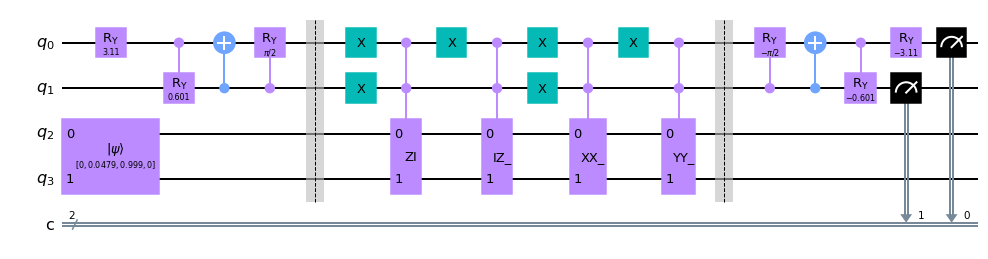

In [497]:
H2c_cir = QuantumCircuit(4,2)
#state preparation and apply V
H2c_cir.initialize(list(v[0]),[2,3])
H2c_cir.compose(V_cir,[0,1],inplace = True)
H2c_cir.barrier()
#applying unitaries as sum
#gates are directly taken from H2,JWT, EFT
H2c_cir.x([0,1])
H2c_cir.append(gZI,[0,1,2,3])
H2c_cir.x(0)
H2c_cir.append(gIZ_,[0,1,2,3])
H2c_cir.x([0,1])
H2c_cir.append(gXX_,[0,1,2,3])
H2c_cir.x(0)
H2c_cir.append(gYY_,[0,1,2,3])
H2c_cir.barrier()
#B dagger
H2c_cir.compose(V_dag,[0,1],inplace = True)
H2c_cir.measure([0,1],[0,1])
H2c_cir.draw('mpl')

In [498]:
E = []
probs = []
shots = 10000
for i in range(20):
    result = execute(H2c_cir, backend = qasm, shots = shots).result()
    count = result.get_counts(H2c_cir)
    probs.append(count['00']/shots)
    E.append(-A*np.sqrt(count['00']/shots)+7.858535) #adding the coefficient for Identity operator
print(E,probs)

[-0.040654132207841975, -0.051931980852333304, -0.04441520330880255, -0.06460037228256077, -0.03030194089458238, -0.050992774321168, -0.027947275008951777, -0.02464956118088857, -0.03595027355680358, -0.027476257462915932, -0.048174485340082285, -0.041594567848081354, -0.003889403001005931, -0.07678044922296756, -0.028889225717000144, -0.0161633843235105, -0.05568769239015037, -0.045825143590006334, -0.027947275008951777, -0.05287107588512452] [0.8399, 0.8423, 0.8407, 0.845, 0.8377, 0.8421, 0.8372, 0.8365, 0.8389, 0.8371, 0.8415, 0.8401, 0.8321, 0.8476, 0.8374, 0.8347, 0.8431, 0.841, 0.8372, 0.8425]


## JWT, N = 3

In [117]:
#H3c = H2c + 15.92676I+...
H3c = (0.00257*Z^I^I)-(7.861105*I^Z^I)-(0.37778*X^X^I)-(0.37778*Y^Y^I)-(15.92676*I^I^Z)-(3.6989*X^Z^X)-(3.6989*Y^Z^Y)+(4.123715*I^X^X)+(4.123715*I^Y^Y)
e,v = np.linalg.eig(H3c.to_matrix())
v = np.transpose(v)
e

array([-12.92329215+0.j,  11.21428093+0.j,  25.49430622+0.j,
        12.92329215+0.j, -11.21428093+0.j, -25.49430622+0.j,
       -23.785295  +0.j,  23.785295  +0.j])

In [118]:
betas = [0.00257,7.861105,0.37778,0.37778,15.92676,3.6989,3.6989,4.123715,4.123715,0,0,0,0,0,0,0]
A = sum(betas)
#thetas, A = theta_computer(betas)

In [119]:
ccry = RYGate(2*thetas[3]).control(2) 

NameError: name 'thetas' is not defined

In [120]:
#V_cir
#Qauntum Circuit for V_gate and V_dag
V_cir = QuantumCircuit(3)
V_cir.ry(2*thetas[0],0)
V_cir.cry(2*thetas[1],0,1)
V_cir.cx(1,0)
V_cir.cry(2*thetas[2],1,0)
V_cir.append(ccry,[0,1,2])
V_cir.cx(2,0)
V_cir.cx(2,1)
V_dag = V_cir.inverse()
V_cir.draw('mpl')

NameError: name 'thetas' is not defined

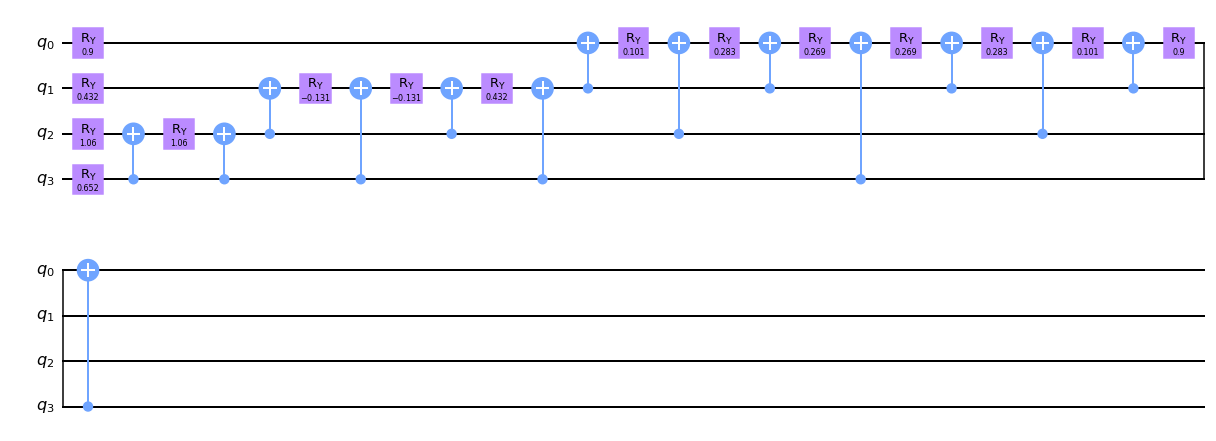

In [121]:
#V and V_dag
gammas = []
for beta in betas:
    gammas.append(np.sqrt(beta/A))
#for Vdag
Vdag =QuantumCircuit(4)
Vdag.initialize(gammas,[0,1,2,3])
transpilecir = transpile(Vdag,basis_gates = ['x','y','z','rx','ry','rz','cx'],optimization_level = 3)
display(transpilecir.draw('mpl'))
V_dag = transpilecir.inverse()

array([6.39443063e-05, 1.95592570e-01, 9.39956421e-03, 9.39956421e-03,
       3.96274560e-01, 9.20325270e-02, 9.20325270e-02, 1.02602372e-01,
       1.02602372e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

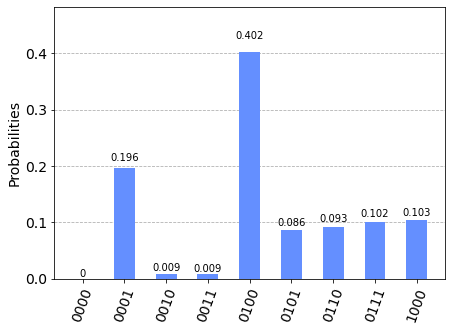

In [122]:
#to test correctness of V
new = np.array(betas)/A
display(new)
#Vdag.compose(V_dag,[0,1,2,3],inplace = True)
Vdag.measure_all()
result = execute(Vdag, backend = simulator, shots = shots).result()
count = result.get_counts(Vdag)
plot_histogram(count)

In [127]:
#only for operators with negative sign, rest we can handle by inbuild gates
IIZ_ = [[-1,0,0,0,0,0,0,0,],[0,1,0,0,0,0,0,0],[0,0,-1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,0,0,-1,0],[0,0,0,0,0,0,0,1]]
XZX_ = [[0,0,0,0,0,-1,0,0],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,0],[0,-1,0,0,0,0,0,0],[-1,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,1,0,0,0,0,0]]
YZY_ = [[0,0,0,0,0,1,0,0],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,0,0,-1],[0,0,0,0,0,0,1,0],[0,-1,0,0,0,0,0,0],[1,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,-1,0,0,0,0,0]]
IZI_ = [[-1,0,0,0,0,0,0,0],[0,-1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,-1,0,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1]]
XXI_ = [[0,0,0,0,0,0,-1,0],[0,0,0,0,0,0,0,-1],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,-1,0,0],[0,0,-1,0,0,0,0,0],[0,0,0,-1,0,0,0,0],[-1,0,0,0,0,0,0,0],[0,-1,0,0,0,0,0,0]]
YYI_ = [[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,-1,0,0],[0,0,-1,0,0,0,0,0],[0,0,0,-1,0,0,0,0],[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0]]
ZII = [[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,-1,0,0,0],[0,0,0,0,0,-1,0,0],[0,0,0,0,0,0,-1,0],[0,0,0,0,0,0,0,-1]]
IXX = [[0,0,0,1,0,0,0,0],[0,0,1,0,0,0,0,0],[0,1,0,0,0,0,0,0],[1,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,0],[0,0,0,0,0,1,0,0],[0,0,0,0,1,0,0,0]]
IYY = [[0,0,0,-1,0,0,0,0],[0,0,1,0,0,0,0,0],[0,1,0,0,0,0,0,0],[-1,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,-1],[0,0,0,0,0,0,1,0],[0,0,0,0,0,1,0,0],[0,0,0,0,-1,0,0,0]]
gZII = qc(ZII).to_gate(label = 'ZII').control(4)
gIIZ_ = qc(IIZ_).to_gate(label = 'IIZ_').control(4)
gXZX_ = qc(XZX_).to_gate(label = 'XZX_').control(4)
gYZY_ = qc(YZY_).to_gate(label = 'YZY_').control(4)
gIZI_ = qc(IZI_).to_gate(label = 'IZI_').control(4)
gXXI_ = qc(XXI_).to_gate(label = 'XXI_').control(4)
gYYI_ = qc(YYI_).to_gate(label = 'YYI_').control(4)
gIXX = qc(IXX).to_gate(label = 'IXX').control(4)
gIYY = qc(IYY).to_gate(label = 'IYY').control(4)

In [128]:
IIZmin = -np.array(ZII)
XXImin = -np.array(IXX)
YYImin = -np.array(IYY)
ZII = -np.array(IIZ_)
IXX = -np.array(XXI_)
IYY = -np.array(YYI_)
gZII = qc(ZII).to_gate(label = 'ZII').control(4)
gIIZ_ = qc(IIZmin).to_gate(label = 'IIZ_').control(4)
gXXI_ = qc(XXImin).to_gate(label = 'XXI_').control(4)
gYYI_ = qc(YYImin).to_gate(label = 'YYI_').control(4)
gIXX = qc(IXX).to_gate(label = 'IXX').control(4)
gIYY = qc(IYY).to_gate(label = 'IYY').control(4)

In [45]:
c4z = MCMT('z',4,1)
c4x2 = MCMT('x',4,2)
c4y2 = MCMT('y',4,2)

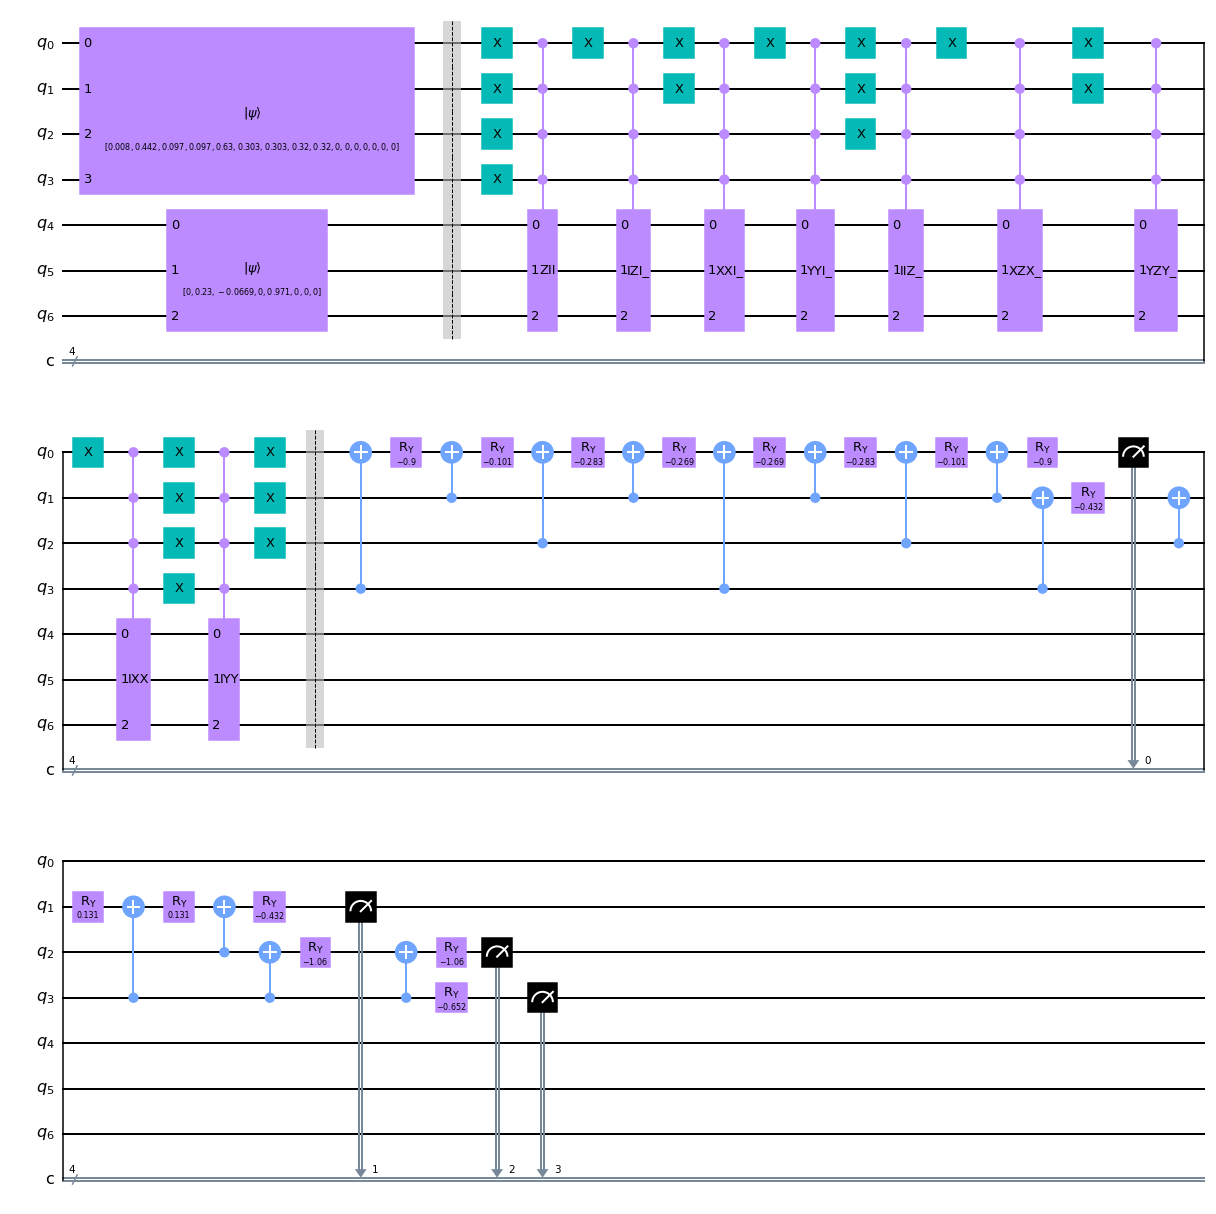

In [132]:
H3c_cir = QuantumCircuit(7,4)
H3c_cir.initialize(v[5],[4,5,6])
H3c_cir.initialize(gammas,[0,1,2,3])
H3c_cir.barrier()
H3c_cir.x([0,1,2,3])
H3c_cir.compose(gZII,[0,1,2,3,4,5,6],inplace = True)
H3c_cir.x([0])
H3c_cir.append(gIZI_,[0,1,2,3,4,5,6])
H3c_cir.x([0,1])
H3c_cir.append(gXXI_,[0,1,2,3,4,5,6])
H3c_cir.x(0)
H3c_cir.compose(gYYI_,[0,1,2,3,4,5,6],inplace = True)
H3c_cir.x([0,1,2])
H3c_cir.compose(gIIZ_,[0,1,2,3,4,5,6],inplace = True)
H3c_cir.x(0)
H3c_cir.append(gXZX_,[0,1,2,3,4,5,6])
H3c_cir.x([0,1])
H3c_cir.append(gYZY_,[0,1,2,3,4,5,6])
H3c_cir.x([0])
H3c_cir.compose(gIXX,[0,1,2,3,4,5,6],inplace = True)
H3c_cir.x([0,1,2,3])
H3c_cir.compose(gIYY,[0,1,2,3,4,5,6],inplace = True)
H3c_cir.x([0,1,2])
H3c_cir.barrier()
H3c_cir.compose(V_dag,[0,1,2,3],inplace = True)
H3c_cir.measure([0,1,2,3],[0,1,2,3])
H3c_cir.draw('mpl')

In [133]:
E = []
probs = []
shots = 10000
for i in range(1):
    result = execute(H3c_cir, backend = qasm, shots = shots).result()
    count = result.get_counts(H3c_cir)
    probs.append(count['0000']/shots)
    E.append(-A*np.sqrt(count['0000']/shots)+15.92676+7.8535) #adding the coefficient for Identity operator
print(E,probs)

[11.516995826552616] [0.0931]


In [527]:
np.mean(E)

-0.03323076864115735

## N = 3, GC

In [579]:
H3c = -(11.895215*Z^I)-(4.03411*I^Z)+(4.03154*Z^Z)-(3.6989*X^X)+(3.6989*Y^Y)+(4.123715*I^X)-(4.123715*Z^X)-(0.37778*X^I)-(0.37778*X^Z)
e,v = np.linalg.eig(H3c.to_matrix())
v = np.transpose(v)
e,v

(array([-13.60165675+0.j,  24.81593385+0.j,   0.6783679 +0.j,
        -11.892645  +0.j]),
 array([[ 0.97078332+0.j,  0.        +0.j, -0.06694698+0.j,
          0.23042969+0.j],
        [-0.19111591+0.j,  0.        +0.j,  0.36497   +0.j,
          0.91119241+0.j],
        [ 0.14510151+0.j,  0.        +0.j,  0.92860917+0.j,
         -0.34151216+0.j],
        [ 0.        +0.j,  1.        +0.j,  0.        +0.j,
          0.        +0.j]]))

In [573]:
betas = [11.895215,4.03411,4.03154,3.6989,3.6989,4.123715,4.123715,0.37778,0.37778,0,0,0,0,0,0,0]
A = sum(betas)
len(betas)

16

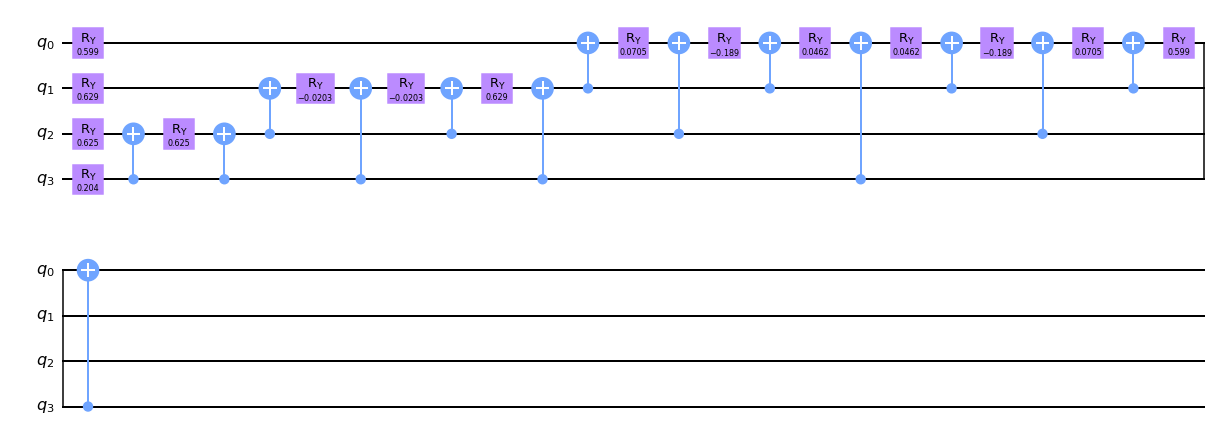

In [577]:
#V and V_dag
gammas = []
for beta in betas:
    gammas.append(np.sqrt(beta/A))
#for Vdag
Vdag =QuantumCircuit(4)
Vdag.initialize(gammas,[0,1,2,3])
transpilecir = transpile(Vdag,basis_gates = ['x','y','z','rx','ry','rz','cx'],optimization_level = 3)
display(transpilecir.draw('mpl'))
V_dag = transpilecir.inverse()

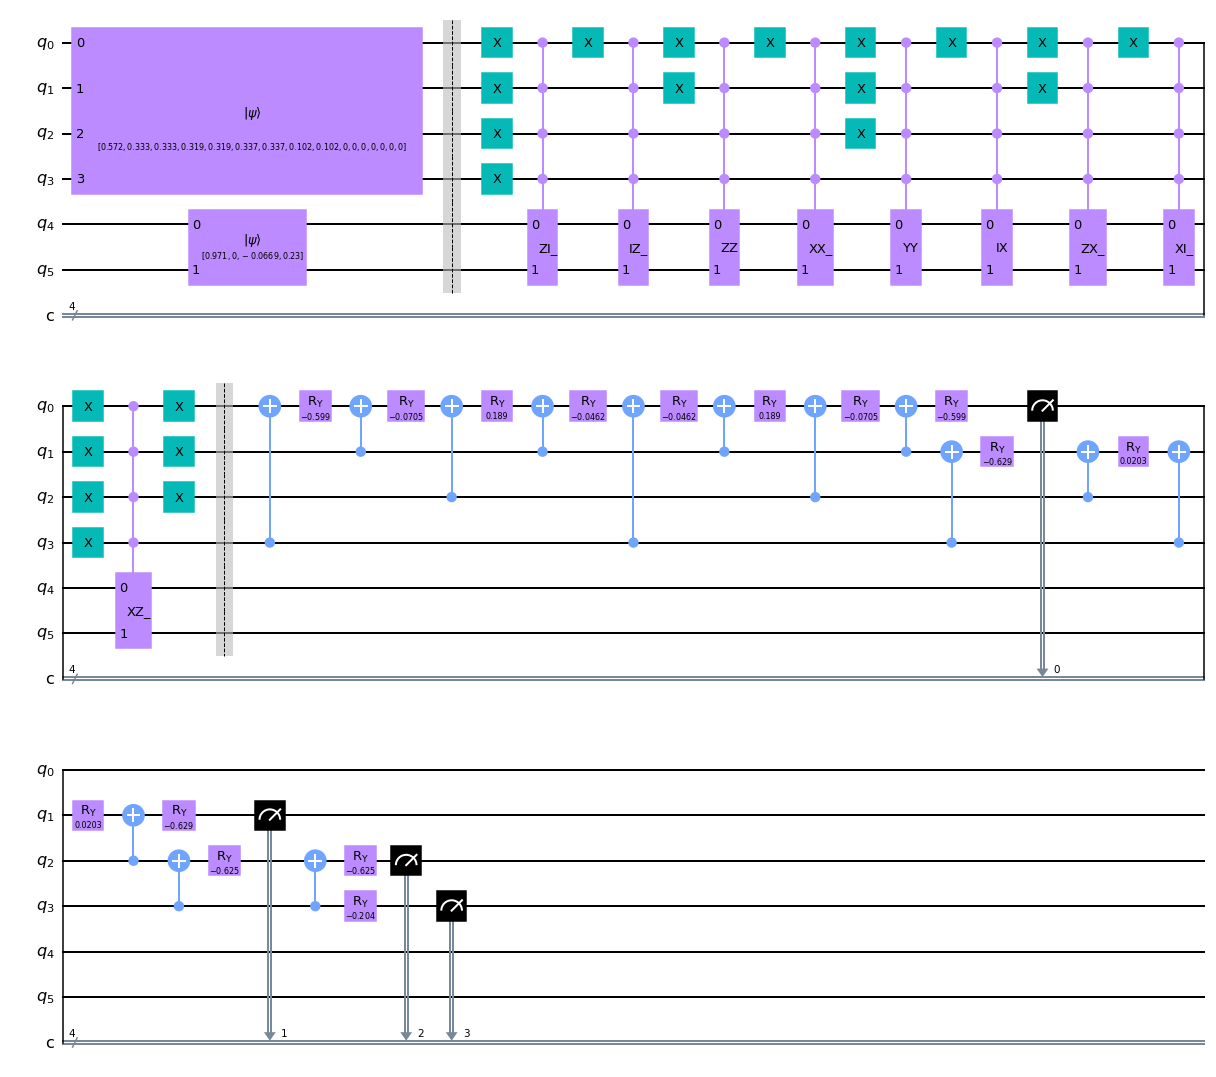

In [604]:
H3c_cir = QuantumCircuit(6,4)
H3c_cir.initialize(v[0],[4,5])
H3c_cir.initialize(gammas,[0,1,2,3])
H3c_cir.barrier()
H3c_cir.x([0,1,2,3])
H3c_cir.compose(gZI_,[0,1,2,3,4,5],inplace = True)
H3c_cir.x([0])
H3c_cir.append(gIZ_,[0,1,2,3,4,5])
H3c_cir.x([0,1])
H3c_cir.append(gZZ,[0,1,2,3,4,5])
H3c_cir.x(0)
H3c_cir.compose(gXX_,[0,1,2,3,4,5],inplace = True)
H3c_cir.x([0,1,2])
H3c_cir.compose(gYY,[0,1,2,3,4,5],inplace = True)
H3c_cir.x(0)
H3c_cir.append(gIX,[0,1,2,3,4,5])
H3c_cir.x([0,1])
H3c_cir.append(gZX_,[0,1,2,3,4,5])
H3c_cir.x([0])
H3c_cir.compose(gXI_,[0,1,2,3,4,5],inplace = True)
H3c_cir.x([0,1,2,3])
H3c_cir.compose(gXZ_,[0,1,2,3,4,5],inplace = True)
H3c_cir.x([0,1,2])
H3c_cir.barrier()
H3c_cir.compose(V_dag,[0,1,2,3],inplace = True)
H3c_cir.measure([0,1,2,3],[0,1,2,3])
H3c_cir.draw('mpl')

In [607]:
E = []
probs = []
shots = 9000
for i in range(10):
    result = execute(H3c_cir, backend = qasm, shots = shots).result()
    count = result.get_counts(H3c_cir)
    probs.append(count['0000']/shots)
    E.append(-A*np.sqrt(count['0000']/shots)+11.892645) #adding the coefficient for Identity operator
print(E,probs)

[-1.6042301255013403, -1.7342190815956222, -1.7987507641554181, -1.8309028141389874, -1.9162756301661528, -1.423423550970055, -2.006409683905737, -1.9162756301661528, -1.979960459778649, -1.5933411563019604] [0.13777777777777778, 0.14044444444444446, 0.14177777777777778, 0.14244444444444446, 0.14422222222222222, 0.1341111111111111, 0.1461111111111111, 0.14422222222222222, 0.14555555555555555, 0.13755555555555554]


In [606]:
np.mean(E)

-1.7492475184120244

## N = 4, GC

In [54]:
#(23.740185*I^I)
H4gc= -(0.047675*Z^I)-(15.88165*I^Z)-(7.816*Z^Z)+(8.14017*X^I)+(1.377005*I^X)-(8.89573*X^Z)-(6.870425*Z^X)-(6.64683*X^X)+(0.75097*Y^Y)
e,v = np.linalg.eig(H4gc.to_matrix())
v = np.transpose(v)
e

array([ 35.85971756+0.j, -25.47980031+0.j,   5.32724403+0.j,
       -15.70716128+0.j])

In [55]:
betas = [0.047675,15.88165,7.816,8.14017,1.377005,8.89573,6.870425,6.64683,0.75097,0,0,0,0,0,0,0]
A = sum(betas)

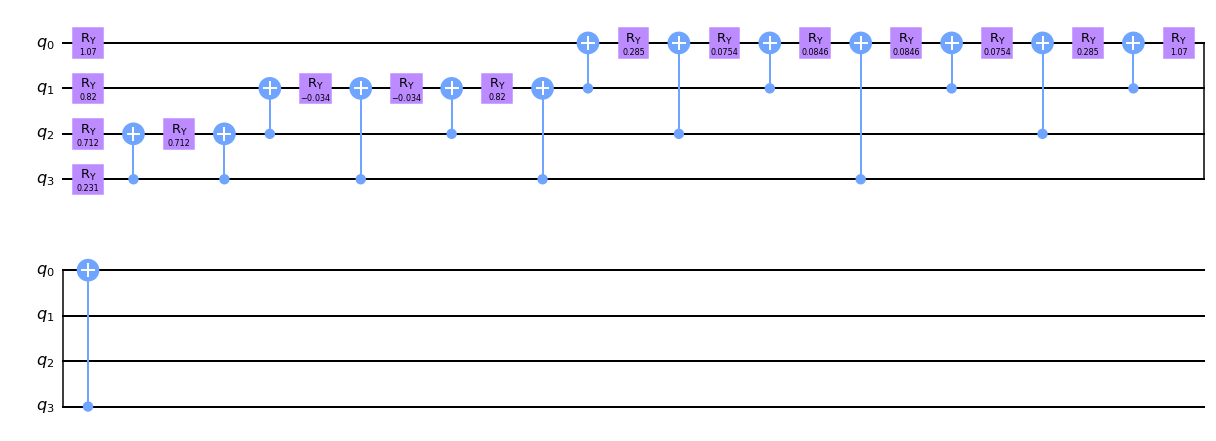

In [56]:
#V and V_dag
gammas = []
for beta in betas:
    gammas.append(np.sqrt(beta/A))
#for Vdag
Vdag =QuantumCircuit(4)
Vdag.initialize(gammas,[0,1,2,3])
transpilecir = transpile(Vdag,basis_gates = ['x','y','z','rx','ry','rz','cx'],optimization_level = 3)
display(transpilecir.draw('mpl'))
V_dag = transpilecir.inverse()

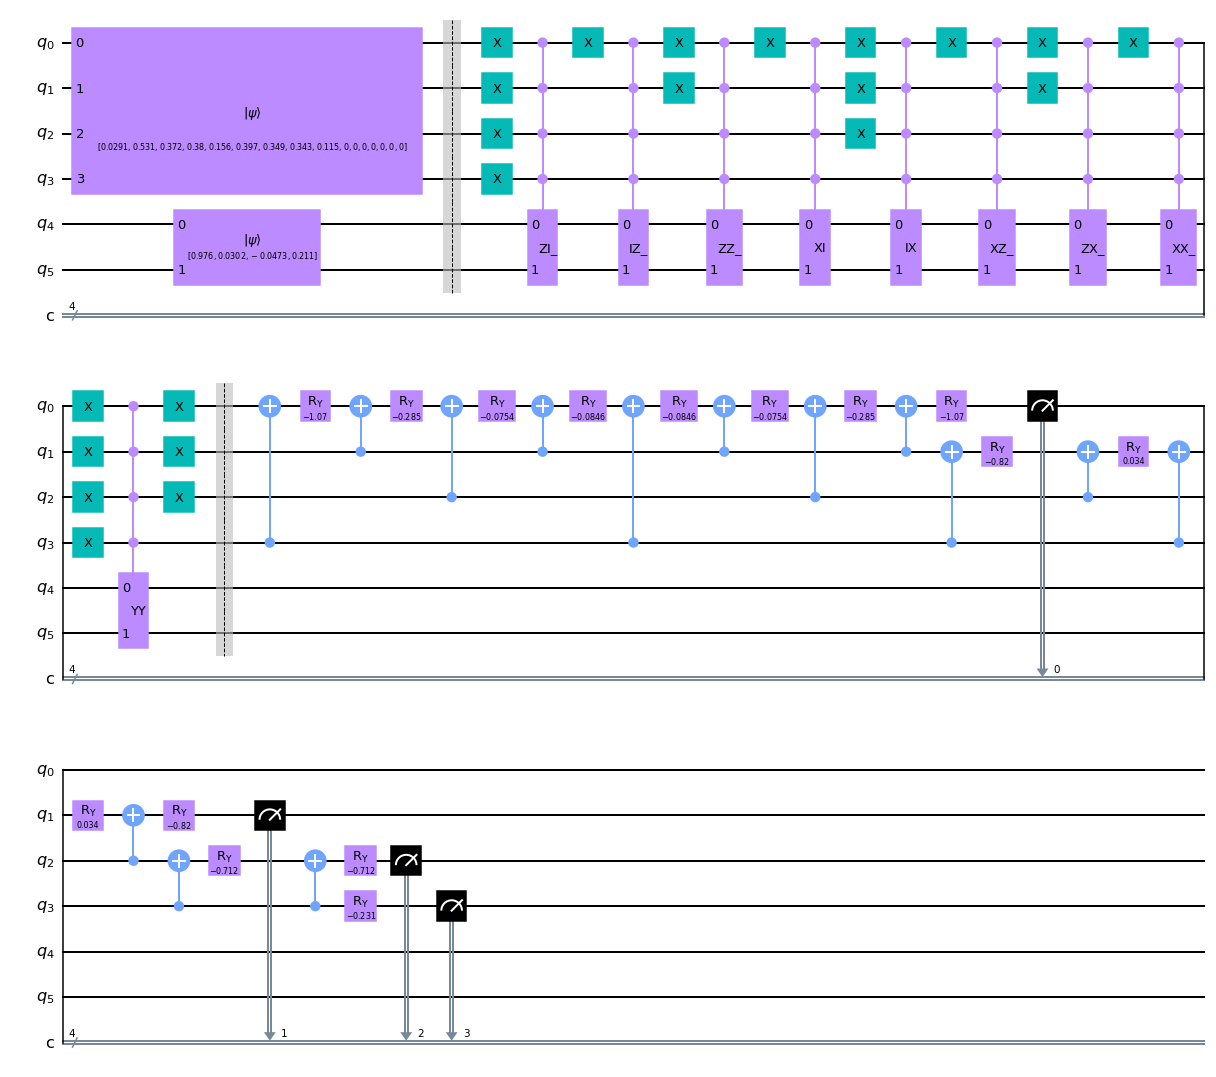

In [57]:
H4c_cir = QuantumCircuit(6,4)
H4c_cir.initialize(v[1],[4,5])
H4c_cir.initialize(gammas,[0,1,2,3])
H4c_cir.barrier()
H4c_cir.x([0,1,2,3])
H4c_cir.compose(gZI_,[0,1,2,3,4,5],inplace = True)
H4c_cir.x([0])
H4c_cir.append(gIZ_,[0,1,2,3,4,5])
H4c_cir.x([0,1])
H4c_cir.append(gZZ_,[0,1,2,3,4,5])
H4c_cir.x(0)
H4c_cir.compose(gXI,[0,1,2,3,4,5],inplace = True)
H4c_cir.x([0,1,2])
H4c_cir.compose(gIX,[0,1,2,3,4,5],inplace = True)
H4c_cir.x(0)
H4c_cir.append(gXZ_,[0,1,2,3,4,5])
H4c_cir.x([0,1])
H4c_cir.append(gZX_,[0,1,2,3,4,5])
H4c_cir.x([0])
H4c_cir.compose(gXX_,[0,1,2,3,4,5],inplace = True)
H4c_cir.x([0,1,2,3])
H4c_cir.compose(gYY,[0,1,2,3,4,5],inplace = True)
H4c_cir.x([0,1,2])
H4c_cir.barrier()
H4c_cir.compose(V_dag,[0,1,2,3],inplace = True)
H4c_cir.measure([0,1,2,3],[0,1,2,3])
H4c_cir.draw('mpl')

In [63]:
E = []
probs = []
shots = 10000
for i in range(20):
    result = execute(H4c_cir, backend = qasm, shots = shots).result()
    count = result.get_counts(H4c_cir)
    probs.append(count['0000']/shots)
    E.append(-A*np.sqrt(count['0000']/shots)+23.740185) #adding the coefficient for Identity operator
print(E,probs)

[-1.7518360762359855, -1.96948138124257, -1.814209600051214, -1.6454493696722636, -1.8515607448577924, -2.0745327330175023, -1.7580802945969332, -1.6203523448816917, -1.4881833636302204, -1.6329039602726994, -1.9136918043606599, -1.5449118088417357, -1.5637930287538708, -1.5763726855233635, -1.3108733565683046, -1.3996846802032863, -1.8079791002389847, -1.4376507773642793, -1.5449118088417357, -1.5008007029354467] [0.2041, 0.2076, 0.2051, 0.2024, 0.2057, 0.2093, 0.2042, 0.202, 0.1999, 0.2022, 0.2067, 0.2008, 0.2011, 0.2013, 0.1971, 0.1985, 0.205, 0.1991, 0.2008, 0.2001]


## N = 4, JWT

In [31]:
#(47.48037*I^I^I^I)+
H4jwt = (0.00257*Z^I^I^I)-(7.861105*I^Z^I^I)-(15.926755*I^I^Z^I)-\
(23.69503*I^I^I^Z)+(4.123715*I^X^X^I)+(4.123715*I^Y^Y^I)-(2.94793*I^X^I^X)-(2.94793*I^Y^I^Y)+\
(8.51795*I^I^X^X)+(8.851795*I^I^Y^Y)-(0.37778*X^X^I^I)-(0.37778*Y^Y^I^I)-\
(3.6989*X^I^X^I)-(3.6989*Y^I^Y^I)-(2.74671*X^I^I^X)-(2.74671*Y^I^I^Y)
e,v = np.linalg.eig(H4jwt.to_matrix())
v = np.transpose(v)
e,v[8]

(array([-47.48180311+0.j,  47.48182703+0.j,  38.18689942+0.j,
        -40.59872728+0.j,  26.95942525+0.j,   8.15721172+0.j,
        -20.34712081+0.j, -12.35771223+0.j, -49.21715775+0.j,
         51.21386705+0.j, -39.5603916 +0.j, -18.60621845+0.j,
         12.42015522+0.j,  34.44034834+0.j,  22.47989882+0.j,
        -13.17050163+0.j]),
 array([-1.39475379e-18+0.j,  2.82742308e-02+0.j,  2.12140448e-01+0.j,
        -7.25624474e-18+0.j, -4.84461789e-02+0.j, -2.29838382e-18+0.j,
        -1.90517887e-17+0.j, -1.49579942e-04+0.j,  9.75618580e-01+0.j,
         4.38188796e-17+0.j, -7.26687422e-17+0.j,  4.15062276e-03+0.j,
         6.41880258e-17+0.j, -7.43630684e-04+0.j,  7.41601615e-04+0.j,
        -4.14189592e-18+0.j]))

In [32]:
betas = [0.00257,7.861105,15.926755,23.69503,4.123715,4.123715,2.94793,2.94793,8.51795,8.851795,0.37778,0.37778,3.6989,3.6989,2.74671,2.74671]
A = sum(betas)

In [34]:
gammas = []
for beta in betas:
    gammas.append(np.sqrt(beta/A))
#for Vdag
Vdag =QuantumCircuit(4)
Vdag.initialize(gammas,[0,1,2,3])
transpilecir = transpile(Vdag,basis_gates = ['x','y','z','rx','ry','rz','cx'])
V_dag = transpilecir.inverse()

array([2.77402166e-05, 8.48516560e-02, 1.71911142e-01, 2.55760804e-01,
       4.45107967e-02, 4.45107967e-02, 3.18195396e-02, 3.18195396e-02,
       9.19415480e-02, 9.55450237e-02, 4.07770391e-03, 4.07770391e-03,
       3.99254036e-02, 3.99254036e-02, 2.96475994e-02, 2.96475994e-02])

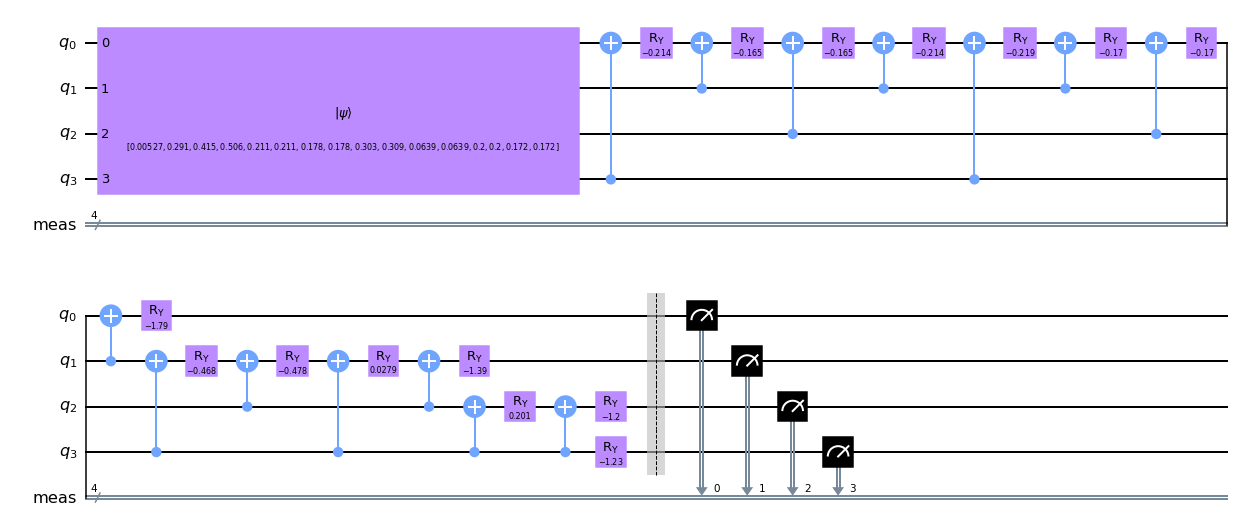

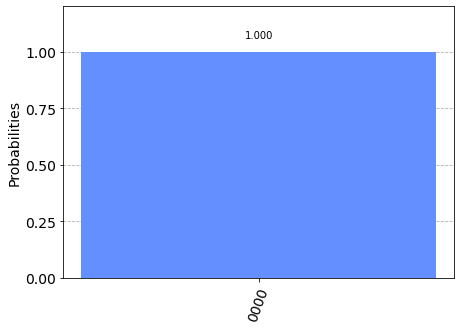

In [25]:
Vdag.compose(V_dag,[0,1,2,3],inplace = True)
new = np.array(betas)/A
display(new)
Vdag.measure_all()
display(Vdag.draw('mpl'))
result = execute(Vdag,backend = simulator, shots = 8192).result()
count  =result.get_counts()
plot_histogram(count)

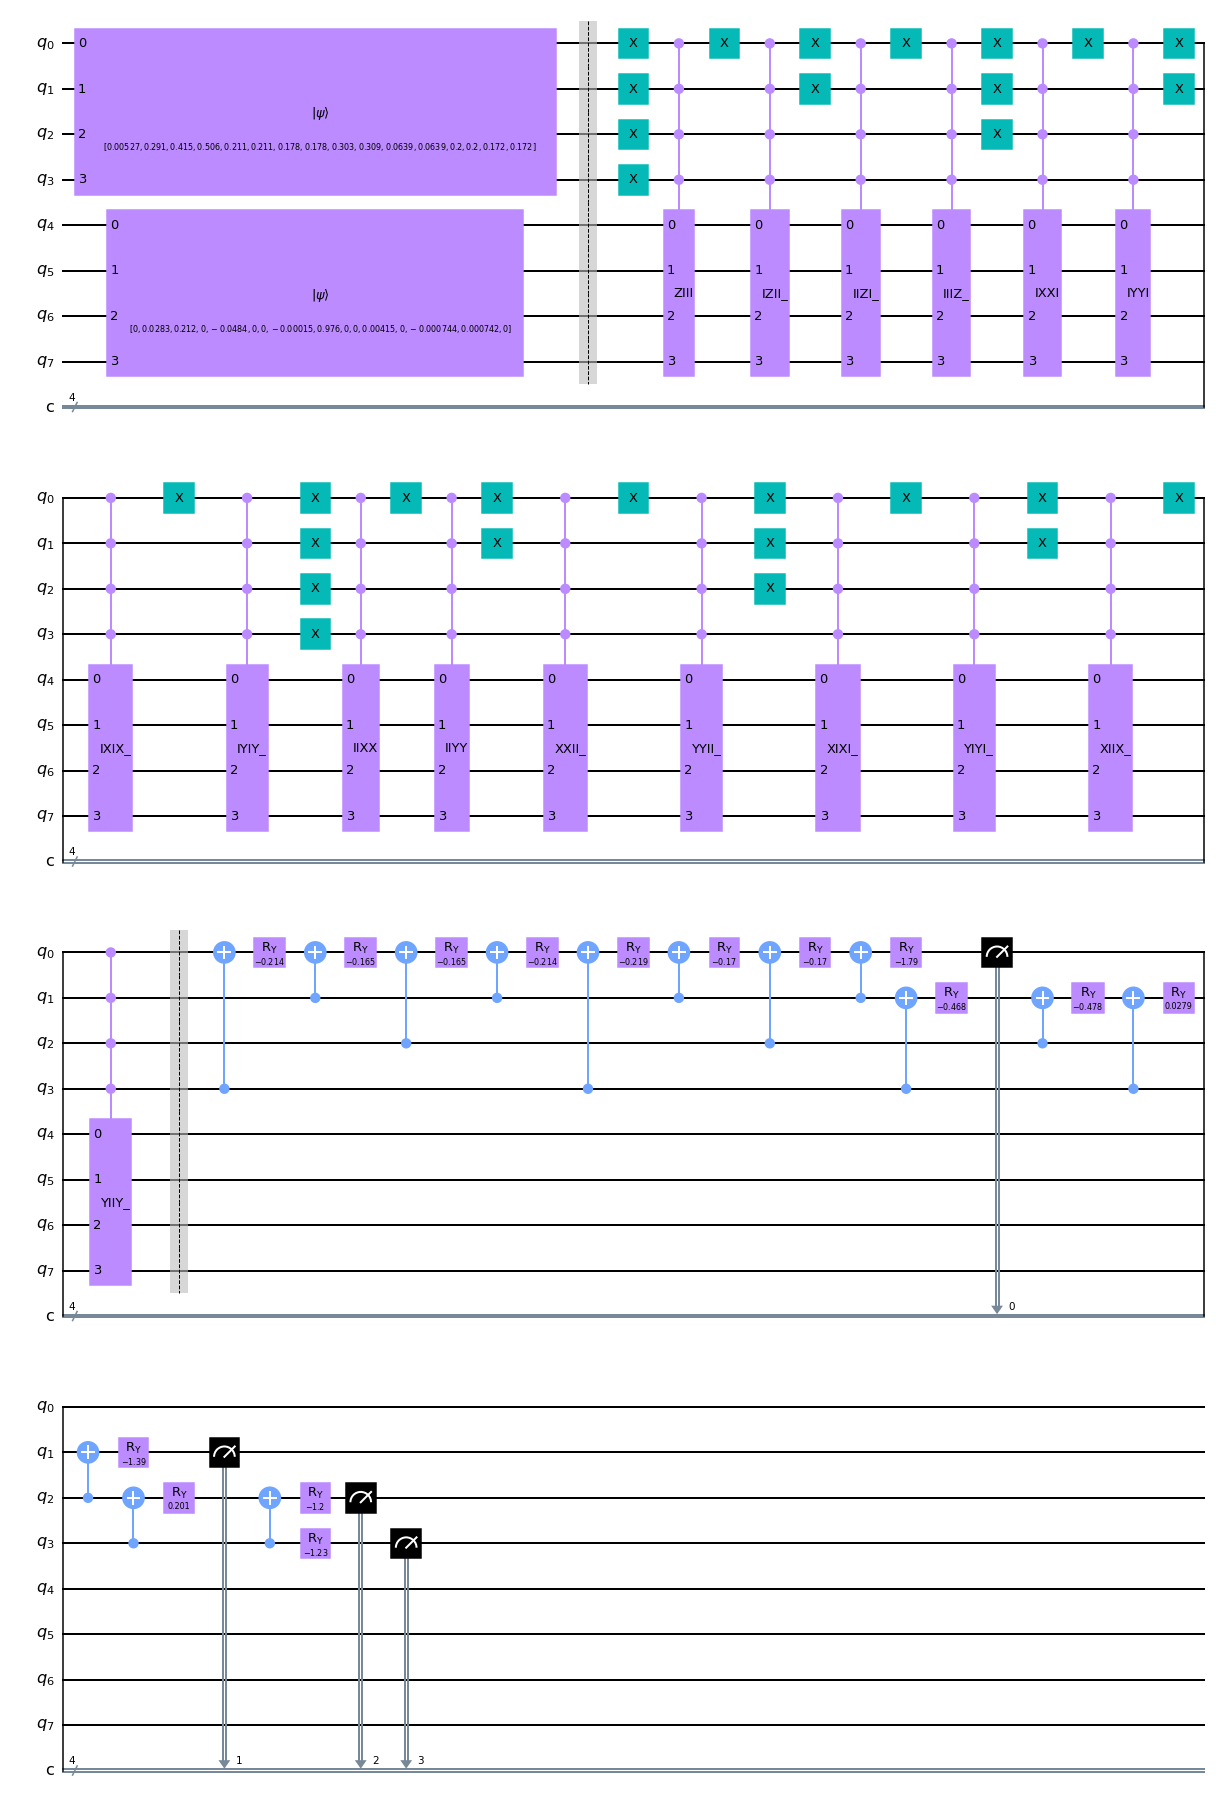

In [35]:
H4c_cir = QuantumCircuit(8,4)
H4c_cir.initialize(v[8],[4,5,6,7])
H4c_cir.initialize(gammas,[0,1,2,3])
H4c_cir.barrier()
H4c_cir.x([0,1,2,3])
H4c_cir.compose(ZIII,list(range(8)),inplace = True)
H4c_cir.x([0])
H4c_cir.compose(IZII_,list(range(8)),inplace = True)
H4c_cir.x([0,1])
H4c_cir.compose(IIZI_,list(range(8)),inplace = True)
H4c_cir.x(0)
H4c_cir.compose(IIIZ_,list(range(8)),inplace = True)
H4c_cir.x([0,1,2])
H4c_cir.compose(IXXI,list(range(8)),inplace = True)
H4c_cir.x(0)
H4c_cir.compose(IYYI,list(range(8)),inplace = True)
H4c_cir.x([0,1])
H4c_cir.compose(IXIX_,list(range(8)),inplace = True)
H4c_cir.x([0])
H4c_cir.compose(IYIY_,list(range(8)),inplace = True)
H4c_cir.x([0,1,2,3])
H4c_cir.compose(IIXX,list(range(8)),inplace = True)
H4c_cir.x([0])
H4c_cir.compose(IIYY,list(range(8)),inplace = True)
H4c_cir.x([0,1])
H4c_cir.compose(XXII_,list(range(8)),inplace = True)
H4c_cir.x(0)
H4c_cir.compose(YYII_,list(range(8)),inplace = True)
H4c_cir.x([0,1,2])
H4c_cir.compose(XIXI_,list(range(8)),inplace = True)
H4c_cir.x([0])
H4c_cir.compose(YIYI_,list(range(8)),inplace = True)
H4c_cir.x([0,1])
H4c_cir.compose(XIIX_,list(range(8)),inplace = True)
H4c_cir.x(0)
H4c_cir.compose(YIIY_,list(range(8)),inplace = True)
H4c_cir.barrier()
H4c_cir.compose(V_dag,[0,1,2,3],inplace = True)
H4c_cir.measure([0,1,2,3],[0,1,2,3])
H4c_cir.draw('mpl')

In [30]:
E = []
probs = []
shots = 9000
for i in range(1):
    result = execute(H4c_cir, backend = qasm, shots = shots).result()
    count = result.get_counts(H4c_cir)
    probs.append(count['0000']/shots)
    E.append(-A*np.sqrt(count['0000']/shots)+47.48037) #adding the coefficient for Identity operator
print(E,probs)

[19.345749189698076] [0.09222222222222222]
